<a href="https://colab.research.google.com/github/yrnkosar/Lipreading/blob/main/lipreadingLast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/rizkiarm/LipNet.git
%cd LipNet

Cloning into 'LipNet'...
remote: Enumerating objects: 355, done.
remote: Total 355 (delta 0), reused 0 (delta 0), pack-reused 355
Receiving objects: 100% (355/355), 125.85 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Updating files: 100% (134/134), done.
/content/LipNet


In [ ]:
!pip install opencv-python matplotlib imageio gdown tensorflow pydrive keras dlib


In [ ]:
import os
import cv2
import dlib
import tensorflow as tf
import numpy as np
import imageio
import shutil
import gdown
from moviepy.editor import VideoFileClip
from tensorflow import keras
from google.colab.patches import cv2_imshow
from typing import List
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, LSTM, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# Dlib shape predictor model dosyasını indirme
url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
output = '/content/shape_predictor_68_face_landmarks.dat.bz2'
gdown.download(url, output, quiet=False)

# Dosyayı açma
!bzip2 -dk /content/shape_predictor_68_face_landmarks.dat.bz2

Downloading...
From: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
To: /content/shape_predictor_68_face_landmarks.dat.bz2
100%|██████████| 64.0M/64.0M [00:03<00:00, 18.3MB/s]


In [ ]:
# Google Drive'da belirli bir klasöre erişim
drive_path = '/content/drive/My Drive/lipdata/lipdata'

In [ ]:
# Klasördeki dosyaları listeleme
file_list = os.listdir(drive_path)
print("Files in the folder:")
for file_name in file_list:
    print(file_name)

# Google Drive'daki video dosyasının yolu
drive_video_path = '/content/drive/My Drive/lipdata/lipdata/vid/bbaf2n.mpg'

# Video dosyasını açma
cap = cv2.VideoCapture(drive_video_path)

Files in the folder:
vid
aligm


Global Lip Region: x_min=125, y_min=194, x_max=190, y_max=235


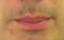

Saved frame 96 (Time: 23750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0095.png


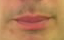

Saved frame 97 (Time: 24000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0096.png


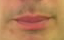

Saved frame 98 (Time: 24250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0097.png


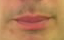

Saved frame 99 (Time: 24500.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0098.png


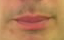

Saved frame 100 (Time: 24750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0099.png


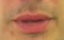

Saved frame 101 (Time: 25000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0100.png


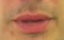

Saved frame 102 (Time: 25250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0101.png


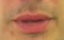

Saved frame 103 (Time: 25500.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0102.png


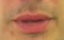

Saved frame 104 (Time: 25750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0103.png


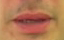

Saved frame 105 (Time: 26000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0104.png


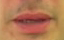

Saved frame 106 (Time: 26250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0105.png


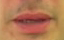

Saved frame 107 (Time: 26500.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0106.png


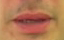

Saved frame 108 (Time: 26750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0107.png


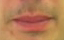

Saved frame 109 (Time: 27000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0108.png


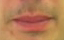

Saved frame 110 (Time: 27250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0109.png


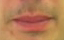

Saved frame 111 (Time: 27500.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0110.png


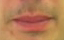

Saved frame 112 (Time: 27750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0111.png


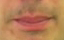

Saved frame 113 (Time: 28000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0112.png


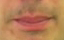

Saved frame 114 (Time: 28250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0113.png


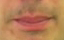

Saved frame 115 (Time: 28500.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0114.png


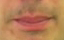

Saved frame 116 (Time: 28750.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0115.png


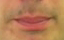

Saved frame 117 (Time: 29000.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0116.png


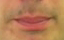

Saved frame 118 (Time: 29250.00 ms) -> Label: bin to /content/drive/My Drive/lipdata/lip_frames/bin/bin_bbaf2n/bin_0117.png


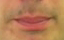

Saved frame 119 (Time: 29500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0118.png


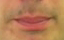

Saved frame 120 (Time: 29750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0119.png


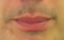

Saved frame 121 (Time: 30000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0120.png


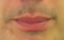

Saved frame 122 (Time: 30250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0121.png


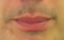

Saved frame 123 (Time: 30500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0122.png


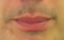

Saved frame 124 (Time: 30750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0123.png


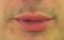

Saved frame 125 (Time: 31000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0124.png


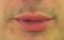

Saved frame 126 (Time: 31250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0125.png


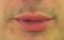

Saved frame 127 (Time: 31500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0126.png


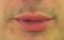

Saved frame 128 (Time: 31750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0127.png


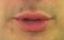

Saved frame 129 (Time: 32000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0128.png


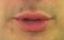

Saved frame 130 (Time: 32250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0129.png


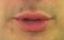

Saved frame 131 (Time: 32500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0130.png


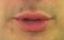

Saved frame 132 (Time: 32750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0131.png


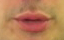

Saved frame 133 (Time: 33000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0132.png


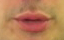

Saved frame 134 (Time: 33250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0133.png


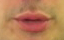

Saved frame 135 (Time: 33500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0134.png


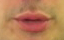

Saved frame 136 (Time: 33750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_bbaf2n/blue_0135.png


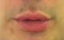

Saved frame 137 (Time: 34000.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0136.png


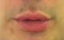

Saved frame 138 (Time: 34250.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0137.png


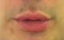

Saved frame 139 (Time: 34500.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0138.png


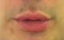

Saved frame 140 (Time: 34750.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0139.png


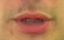

Saved frame 141 (Time: 35000.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0140.png


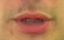

Saved frame 142 (Time: 35250.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_bbaf2n/at_0141.png


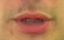

Saved frame 143 (Time: 35500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0142.png


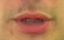

Saved frame 144 (Time: 35750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0143.png


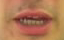

Saved frame 145 (Time: 36000.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0144.png


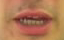

Saved frame 146 (Time: 36250.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0145.png


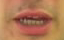

Saved frame 147 (Time: 36500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0146.png


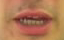

Saved frame 148 (Time: 36750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0147.png


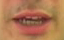

Saved frame 149 (Time: 37000.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0148.png


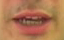

Saved frame 150 (Time: 37250.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0149.png


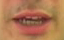

Saved frame 151 (Time: 37500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0150.png


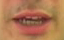

Saved frame 152 (Time: 37750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0151.png


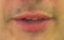

Saved frame 153 (Time: 38000.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0152.png


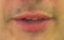

Saved frame 154 (Time: 38250.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0153.png


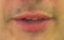

Saved frame 155 (Time: 38500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0154.png


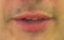

Saved frame 156 (Time: 38750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0155.png


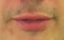

Saved frame 157 (Time: 39000.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0156.png


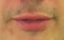

Saved frame 158 (Time: 39250.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0157.png


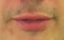

Saved frame 159 (Time: 39500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0158.png


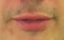

Saved frame 160 (Time: 39750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0159.png


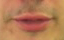

Saved frame 161 (Time: 40000.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0160.png


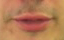

Saved frame 162 (Time: 40250.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0161.png


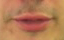

Saved frame 163 (Time: 40500.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0162.png


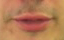

Saved frame 164 (Time: 40750.00 ms) -> Label: f to /content/drive/My Drive/lipdata/lip_frames/f/f_bbaf2n/f_0163.png


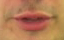

Saved frame 165 (Time: 41000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0164.png


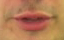

Saved frame 166 (Time: 41250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0165.png


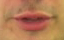

Saved frame 167 (Time: 41500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0166.png


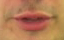

Saved frame 168 (Time: 41750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0167.png


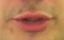

Saved frame 169 (Time: 42000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0168.png


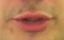

Saved frame 170 (Time: 42250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0169.png


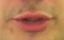

Saved frame 171 (Time: 42500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0170.png


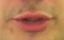

Saved frame 172 (Time: 42750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0171.png


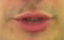

Saved frame 173 (Time: 43000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0172.png


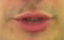

Saved frame 174 (Time: 43250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0173.png


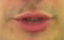

Saved frame 175 (Time: 43500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0174.png


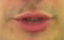

Saved frame 176 (Time: 43750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0175.png


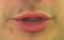

Saved frame 177 (Time: 44000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0176.png


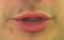

Saved frame 178 (Time: 44250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0177.png


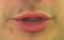

Saved frame 179 (Time: 44500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0178.png


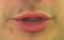

Saved frame 180 (Time: 44750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0179.png


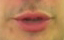

Saved frame 181 (Time: 45000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0180.png


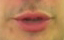

Saved frame 182 (Time: 45250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0181.png


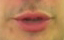

Saved frame 183 (Time: 45500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0182.png


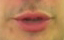

Saved frame 184 (Time: 45750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0183.png


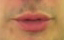

Saved frame 185 (Time: 46000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0184.png


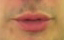

Saved frame 186 (Time: 46250.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0185.png


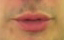

Saved frame 187 (Time: 46500.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0186.png


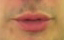

Saved frame 188 (Time: 46750.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0187.png


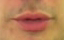

Saved frame 189 (Time: 47000.00 ms) -> Label: two to /content/drive/My Drive/lipdata/lip_frames/two/two_bbaf2n/two_0188.png


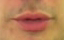

Saved frame 190 (Time: 47250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0189.png


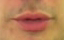

Saved frame 191 (Time: 47500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0190.png


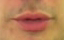

Saved frame 192 (Time: 47750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0191.png


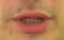

Saved frame 193 (Time: 48000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0192.png


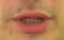

Saved frame 194 (Time: 48250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0193.png


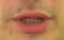

Saved frame 195 (Time: 48500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0194.png


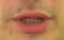

Saved frame 196 (Time: 48750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0195.png


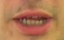

Saved frame 197 (Time: 49000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0196.png


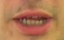

Saved frame 198 (Time: 49250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0197.png


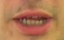

Saved frame 199 (Time: 49500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0198.png


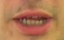

Saved frame 200 (Time: 49750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0199.png


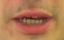

Saved frame 201 (Time: 50000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0200.png


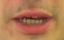

Saved frame 202 (Time: 50250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0201.png


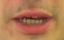

Saved frame 203 (Time: 50500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0202.png


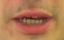

Saved frame 204 (Time: 50750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0203.png


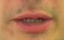

Saved frame 205 (Time: 51000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0204.png


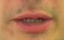

Saved frame 206 (Time: 51250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0205.png


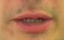

Saved frame 207 (Time: 51500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0206.png


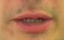

Saved frame 208 (Time: 51750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0207.png


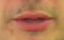

Saved frame 209 (Time: 52000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0208.png


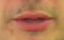

Saved frame 210 (Time: 52250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0209.png


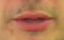

Saved frame 211 (Time: 52500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0210.png


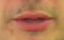

Saved frame 212 (Time: 52750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_bbaf2n/now_0211.png


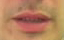

Saved frame 5 (Time: 1000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0004.png


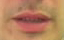

Saved frame 6 (Time: 1250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0005.png


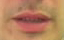

Saved frame 7 (Time: 1500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0006.png


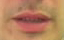

Saved frame 8 (Time: 1750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0007.png


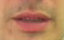

Saved frame 9 (Time: 2000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0008.png


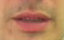

Saved frame 10 (Time: 2250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0009.png


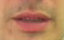

Saved frame 11 (Time: 2500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0010.png


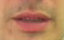

Saved frame 12 (Time: 2750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0011.png


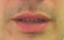

Saved frame 13 (Time: 3000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0012.png


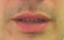

Saved frame 14 (Time: 3250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0013.png


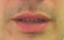

Saved frame 15 (Time: 3500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0014.png


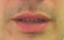

Saved frame 16 (Time: 3750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0015.png


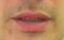

Saved frame 17 (Time: 4000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0016.png


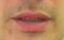

Saved frame 18 (Time: 4250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0017.png


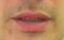

Saved frame 19 (Time: 4500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0018.png


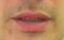

Saved frame 20 (Time: 4750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0019.png


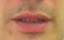

Saved frame 21 (Time: 5000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0020.png


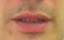

Saved frame 22 (Time: 5250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0021.png


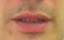

Saved frame 23 (Time: 5500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0022.png


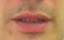

Saved frame 24 (Time: 5750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0023.png


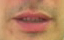

Saved frame 25 (Time: 6000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0024.png


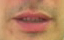

Saved frame 26 (Time: 6250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0025.png


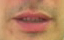

Saved frame 27 (Time: 6500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0026.png


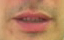

Saved frame 28 (Time: 6750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0027.png


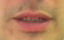

Saved frame 29 (Time: 7000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0028.png


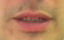

Saved frame 30 (Time: 7250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0029.png


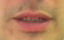

Saved frame 31 (Time: 7500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0030.png


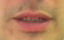

Saved frame 32 (Time: 7750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0031.png


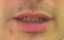

Saved frame 33 (Time: 8000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0032.png


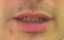

Saved frame 34 (Time: 8250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0033.png


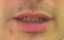

Saved frame 35 (Time: 8500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0034.png


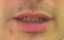

Saved frame 36 (Time: 8750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0035.png


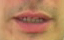

Saved frame 37 (Time: 9000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0036.png


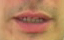

Saved frame 38 (Time: 9250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0037.png


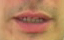

Saved frame 39 (Time: 9500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0038.png


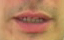

Saved frame 40 (Time: 9750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0039.png


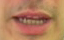

Saved frame 41 (Time: 10000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0040.png


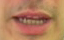

Saved frame 42 (Time: 10250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0041.png


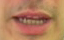

Saved frame 43 (Time: 10500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0042.png


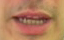

Saved frame 44 (Time: 10750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0043.png


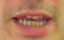

Saved frame 45 (Time: 11000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0044.png


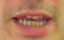

Saved frame 46 (Time: 11250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0045.png


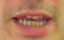

Saved frame 47 (Time: 11500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0046.png


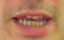

Saved frame 48 (Time: 11750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0047.png


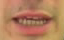

Saved frame 49 (Time: 12000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0048.png


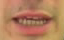

Saved frame 50 (Time: 12250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0049.png


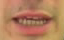

Saved frame 51 (Time: 12500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0050.png


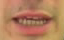

Saved frame 52 (Time: 12750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0051.png


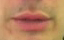

Saved frame 53 (Time: 13000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0052.png


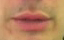

Saved frame 54 (Time: 13250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0053.png


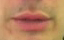

Saved frame 55 (Time: 13500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrwszp/lay_0054.png


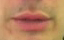

Saved frame 56 (Time: 13750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0055.png


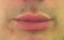

Saved frame 57 (Time: 14000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0056.png


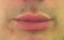

Saved frame 58 (Time: 14250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0057.png


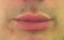

Saved frame 59 (Time: 14500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0058.png


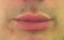

Saved frame 60 (Time: 14750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0059.png


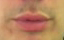

Saved frame 61 (Time: 15000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0060.png


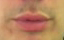

Saved frame 62 (Time: 15250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0061.png


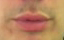

Saved frame 63 (Time: 15500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0062.png


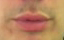

Saved frame 64 (Time: 15750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0063.png


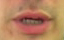

Saved frame 65 (Time: 16000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0064.png


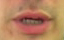

Saved frame 66 (Time: 16250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0065.png


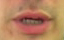

Saved frame 67 (Time: 16500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0066.png


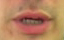

Saved frame 68 (Time: 16750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0067.png


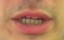

Saved frame 69 (Time: 17000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0068.png


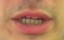

Saved frame 70 (Time: 17250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0069.png


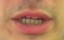

Saved frame 71 (Time: 17500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0070.png


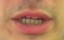

Saved frame 72 (Time: 17750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0071.png


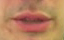

Saved frame 73 (Time: 18000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0072.png


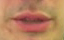

Saved frame 74 (Time: 18250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0073.png


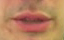

Saved frame 75 (Time: 18500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrwszp/red_0074.png


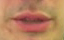

Saved frame 76 (Time: 18750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0075.png


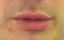

Saved frame 77 (Time: 19000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0076.png


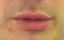

Saved frame 78 (Time: 19250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0077.png


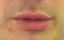

Saved frame 79 (Time: 19500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0078.png


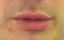

Saved frame 80 (Time: 19750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0079.png


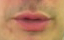

Saved frame 81 (Time: 20000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0080.png


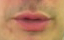

Saved frame 82 (Time: 20250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0081.png


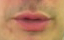

Saved frame 83 (Time: 20500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0082.png


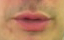

Saved frame 84 (Time: 20750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0083.png


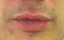

Saved frame 85 (Time: 21000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0084.png


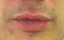

Saved frame 86 (Time: 21250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrwszp/with_0085.png


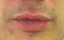

Saved frame 87 (Time: 21500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0086.png


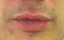

Saved frame 88 (Time: 21750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0087.png


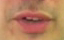

Saved frame 89 (Time: 22000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0088.png


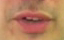

Saved frame 90 (Time: 22250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0089.png


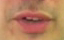

Saved frame 91 (Time: 22500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0090.png


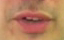

Saved frame 92 (Time: 22750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0091.png


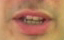

Saved frame 93 (Time: 23000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0092.png


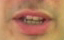

Saved frame 94 (Time: 23250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0093.png


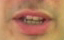

Saved frame 95 (Time: 23500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0094.png


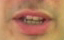

Saved frame 96 (Time: 23750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0095.png


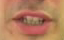

Saved frame 97 (Time: 24000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0096.png


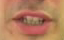

Saved frame 98 (Time: 24250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0097.png


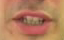

Saved frame 99 (Time: 24500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0098.png


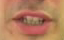

Saved frame 100 (Time: 24750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0099.png


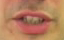

Saved frame 101 (Time: 25000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0100.png


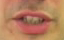

Saved frame 102 (Time: 25250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0101.png


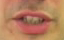

Saved frame 103 (Time: 25500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0102.png


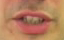

Saved frame 104 (Time: 25750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrwszp/s_0103.png


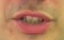

Saved frame 105 (Time: 26000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0104.png


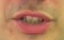

Saved frame 106 (Time: 26250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0105.png


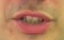

Saved frame 107 (Time: 26500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0106.png


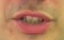

Saved frame 108 (Time: 26750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0107.png


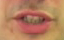

Saved frame 109 (Time: 27000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0108.png


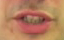

Saved frame 110 (Time: 27250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0109.png


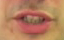

Saved frame 111 (Time: 27500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0110.png


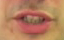

Saved frame 112 (Time: 27750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0111.png


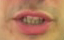

Saved frame 113 (Time: 28000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0112.png


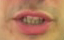

Saved frame 114 (Time: 28250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0113.png


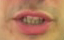

Saved frame 115 (Time: 28500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0114.png


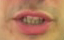

Saved frame 116 (Time: 28750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0115.png


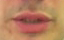

Saved frame 117 (Time: 29000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0116.png


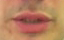

Saved frame 118 (Time: 29250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0117.png


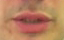

Saved frame 119 (Time: 29500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0118.png


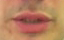

Saved frame 120 (Time: 29750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0119.png


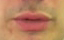

Saved frame 121 (Time: 30000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0120.png


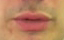

Saved frame 122 (Time: 30250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0121.png


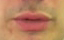

Saved frame 123 (Time: 30500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0122.png


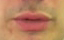

Saved frame 124 (Time: 30750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0123.png


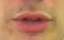

Saved frame 125 (Time: 31000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0124.png


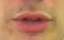

Saved frame 126 (Time: 31250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0125.png


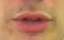

Saved frame 127 (Time: 31500.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0126.png


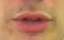

Saved frame 128 (Time: 31750.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0127.png


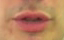

Saved frame 129 (Time: 32000.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0128.png


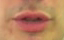

Saved frame 130 (Time: 32250.00 ms) -> Label: zero to /content/drive/My Drive/lipdata/lip_frames/zero/zero_lrwszp/zero_0129.png


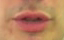

Saved frame 131 (Time: 32500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0130.png


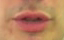

Saved frame 132 (Time: 32750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0131.png


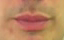

Saved frame 133 (Time: 33000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0132.png


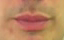

Saved frame 134 (Time: 33250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0133.png


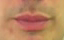

Saved frame 135 (Time: 33500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0134.png


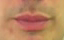

Saved frame 136 (Time: 33750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0135.png


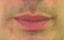

Saved frame 137 (Time: 34000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0136.png


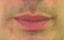

Saved frame 138 (Time: 34250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0137.png


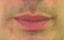

Saved frame 139 (Time: 34500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0138.png


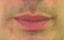

Saved frame 140 (Time: 34750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0139.png


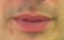

Saved frame 141 (Time: 35000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0140.png


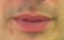

Saved frame 142 (Time: 35250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0141.png


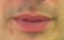

Saved frame 143 (Time: 35500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0142.png


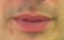

Saved frame 144 (Time: 35750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0143.png


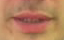

Saved frame 145 (Time: 36000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0144.png


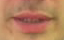

Saved frame 146 (Time: 36250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0145.png


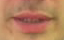

Saved frame 147 (Time: 36500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0146.png


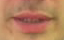

Saved frame 148 (Time: 36750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0147.png


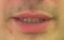

Saved frame 149 (Time: 37000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0148.png


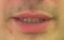

Saved frame 150 (Time: 37250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0149.png


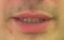

Saved frame 151 (Time: 37500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0150.png


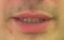

Saved frame 152 (Time: 37750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0151.png


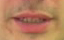

Saved frame 153 (Time: 38000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0152.png


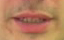

Saved frame 154 (Time: 38250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0153.png


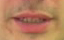

Saved frame 155 (Time: 38500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0154.png


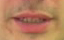

Saved frame 156 (Time: 38750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0155.png


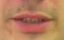

Saved frame 157 (Time: 39000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0156.png


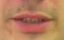

Saved frame 158 (Time: 39250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0157.png


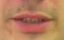

Saved frame 159 (Time: 39500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0158.png


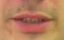

Saved frame 160 (Time: 39750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0159.png


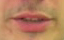

Saved frame 161 (Time: 40000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0160.png


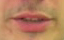

Saved frame 162 (Time: 40250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0161.png


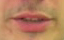

Saved frame 163 (Time: 40500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0162.png


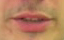

Saved frame 164 (Time: 40750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0163.png


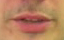

Saved frame 165 (Time: 41000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0164.png


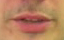

Saved frame 166 (Time: 41250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0165.png


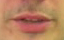

Saved frame 167 (Time: 41500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0166.png


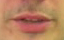

Saved frame 168 (Time: 41750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0167.png


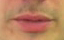

Saved frame 169 (Time: 42000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0168.png


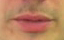

Saved frame 170 (Time: 42250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0169.png


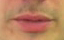

Saved frame 171 (Time: 42500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0170.png


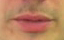

Saved frame 172 (Time: 42750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lrwszp/please_0171.png


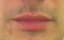

Saved frame 22 (Time: 5250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0021.png


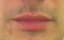

Saved frame 23 (Time: 5500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0022.png


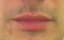

Saved frame 24 (Time: 5750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0023.png


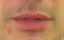

Saved frame 25 (Time: 6000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0024.png


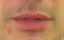

Saved frame 26 (Time: 6250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0025.png


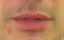

Saved frame 27 (Time: 6500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0026.png


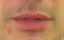

Saved frame 28 (Time: 6750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0027.png


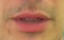

Saved frame 29 (Time: 7000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0028.png


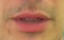

Saved frame 30 (Time: 7250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0029.png


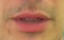

Saved frame 31 (Time: 7500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0030.png


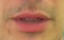

Saved frame 32 (Time: 7750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0031.png


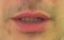

Saved frame 33 (Time: 8000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0032.png


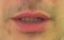

Saved frame 34 (Time: 8250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0033.png


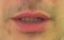

Saved frame 35 (Time: 8500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0034.png


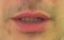

Saved frame 36 (Time: 8750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0035.png


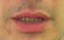

Saved frame 37 (Time: 9000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0036.png


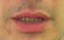

Saved frame 38 (Time: 9250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0037.png


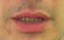

Saved frame 39 (Time: 9500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0038.png


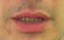

Saved frame 40 (Time: 9750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0039.png


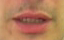

Saved frame 41 (Time: 10000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0040.png


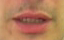

Saved frame 42 (Time: 10250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0041.png


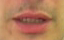

Saved frame 43 (Time: 10500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0042.png


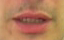

Saved frame 44 (Time: 10750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0043.png


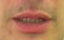

Saved frame 45 (Time: 11000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0044.png


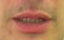

Saved frame 46 (Time: 11250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0045.png


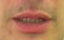

Saved frame 47 (Time: 11500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0046.png


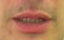

Saved frame 48 (Time: 11750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0047.png


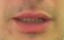

Saved frame 49 (Time: 12000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0048.png


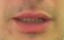

Saved frame 50 (Time: 12250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0049.png


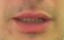

Saved frame 51 (Time: 12500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0050.png


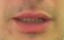

Saved frame 52 (Time: 12750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0051.png


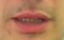

Saved frame 53 (Time: 13000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0052.png


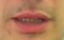

Saved frame 54 (Time: 13250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0053.png


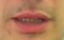

Saved frame 55 (Time: 13500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0054.png


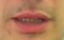

Saved frame 56 (Time: 13750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0055.png


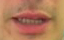

Saved frame 57 (Time: 14000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0056.png


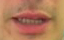

Saved frame 58 (Time: 14250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0057.png


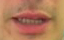

Saved frame 59 (Time: 14500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0058.png


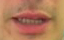

Saved frame 60 (Time: 14750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0059.png


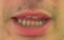

Saved frame 61 (Time: 15000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0060.png


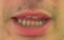

Saved frame 62 (Time: 15250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0061.png


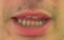

Saved frame 63 (Time: 15500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0062.png


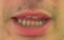

Saved frame 64 (Time: 15750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0063.png


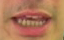

Saved frame 65 (Time: 16000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0064.png


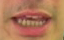

Saved frame 66 (Time: 16250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0065.png


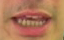

Saved frame 67 (Time: 16500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0066.png


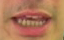

Saved frame 68 (Time: 16750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0067.png


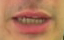

Saved frame 69 (Time: 17000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0068.png


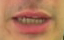

Saved frame 70 (Time: 17250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0069.png


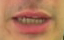

Saved frame 71 (Time: 17500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0070.png


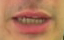

Saved frame 72 (Time: 17750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0071.png


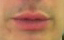

Saved frame 73 (Time: 18000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0072.png


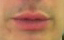

Saved frame 74 (Time: 18250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0073.png


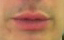

Saved frame 75 (Time: 18500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0074.png


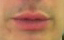

Saved frame 76 (Time: 18750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0075.png


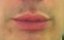

Saved frame 77 (Time: 19000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lrws1a/lay_0076.png


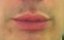

Saved frame 78 (Time: 19250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0077.png


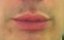

Saved frame 79 (Time: 19500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0078.png


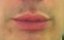

Saved frame 80 (Time: 19750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0079.png


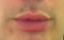

Saved frame 81 (Time: 20000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0080.png


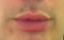

Saved frame 82 (Time: 20250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0081.png


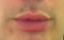

Saved frame 83 (Time: 20500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0082.png


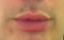

Saved frame 84 (Time: 20750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0083.png


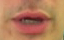

Saved frame 85 (Time: 21000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0084.png


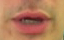

Saved frame 86 (Time: 21250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0085.png


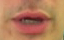

Saved frame 87 (Time: 21500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0086.png


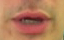

Saved frame 88 (Time: 21750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0087.png


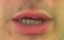

Saved frame 89 (Time: 22000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0088.png


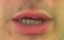

Saved frame 90 (Time: 22250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0089.png


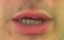

Saved frame 91 (Time: 22500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0090.png


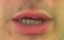

Saved frame 92 (Time: 22750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0091.png


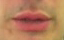

Saved frame 93 (Time: 23000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0092.png


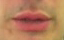

Saved frame 94 (Time: 23250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0093.png


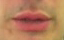

Saved frame 95 (Time: 23500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0094.png


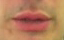

Saved frame 96 (Time: 23750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0095.png


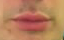

Saved frame 97 (Time: 24000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0096.png


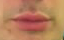

Saved frame 98 (Time: 24250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0097.png


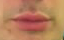

Saved frame 99 (Time: 24500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_lrws1a/red_0098.png


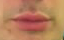

Saved frame 100 (Time: 24750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0099.png


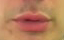

Saved frame 101 (Time: 25000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0100.png


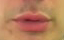

Saved frame 102 (Time: 25250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0101.png


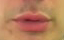

Saved frame 103 (Time: 25500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0102.png


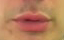

Saved frame 104 (Time: 25750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0103.png


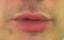

Saved frame 105 (Time: 26000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0104.png


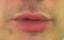

Saved frame 106 (Time: 26250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0105.png


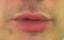

Saved frame 107 (Time: 26500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0106.png


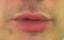

Saved frame 108 (Time: 26750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0107.png


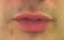

Saved frame 109 (Time: 27000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0108.png


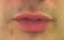

Saved frame 110 (Time: 27250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_lrws1a/with_0109.png


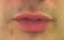

Saved frame 111 (Time: 27500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0110.png


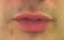

Saved frame 112 (Time: 27750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0111.png


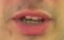

Saved frame 113 (Time: 28000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0112.png


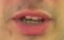

Saved frame 114 (Time: 28250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0113.png


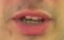

Saved frame 115 (Time: 28500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0114.png


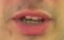

Saved frame 116 (Time: 28750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0115.png


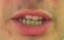

Saved frame 117 (Time: 29000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0116.png


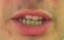

Saved frame 118 (Time: 29250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0117.png


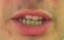

Saved frame 119 (Time: 29500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0118.png


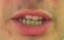

Saved frame 120 (Time: 29750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0119.png


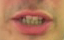

Saved frame 121 (Time: 30000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0120.png


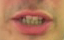

Saved frame 122 (Time: 30250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0121.png


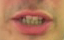

Saved frame 123 (Time: 30500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0122.png


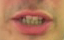

Saved frame 124 (Time: 30750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0123.png


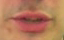

Saved frame 125 (Time: 31000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0124.png


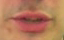

Saved frame 126 (Time: 31250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0125.png


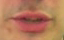

Saved frame 127 (Time: 31500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0126.png


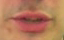

Saved frame 128 (Time: 31750.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0127.png


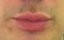

Saved frame 129 (Time: 32000.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0128.png


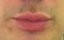

Saved frame 130 (Time: 32250.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0129.png


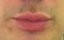

Saved frame 131 (Time: 32500.00 ms) -> Label: s to /content/drive/My Drive/lipdata/lip_frames/s/s_lrws1a/s_0130.png


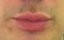

Saved frame 132 (Time: 32750.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0131.png


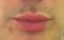

Saved frame 133 (Time: 33000.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0132.png


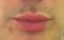

Saved frame 134 (Time: 33250.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0133.png


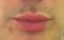

Saved frame 135 (Time: 33500.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0134.png


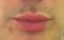

Saved frame 136 (Time: 33750.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0135.png


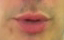

Saved frame 137 (Time: 34000.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0136.png


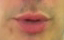

Saved frame 138 (Time: 34250.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0137.png


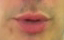

Saved frame 139 (Time: 34500.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0138.png


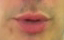

Saved frame 140 (Time: 34750.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0139.png


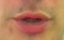

Saved frame 141 (Time: 35000.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0140.png


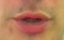

Saved frame 142 (Time: 35250.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0141.png


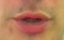

Saved frame 143 (Time: 35500.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0142.png


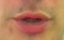

Saved frame 144 (Time: 35750.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0143.png


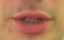

Saved frame 145 (Time: 36000.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0144.png


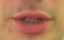

Saved frame 146 (Time: 36250.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0145.png


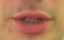

Saved frame 147 (Time: 36500.00 ms) -> Label: one to /content/drive/My Drive/lipdata/lip_frames/one/one_lrws1a/one_0146.png


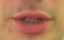

Saved frame 148 (Time: 36750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0147.png


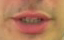

Saved frame 149 (Time: 37000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0148.png


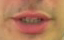

Saved frame 150 (Time: 37250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0149.png


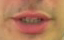

Saved frame 151 (Time: 37500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0150.png


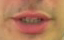

Saved frame 152 (Time: 37750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0151.png


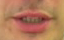

Saved frame 153 (Time: 38000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0152.png


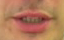

Saved frame 154 (Time: 38250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0153.png


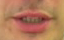

Saved frame 155 (Time: 38500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0154.png


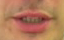

Saved frame 156 (Time: 38750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0155.png


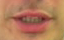

Saved frame 157 (Time: 39000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0156.png


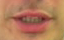

Saved frame 158 (Time: 39250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0157.png


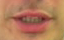

Saved frame 159 (Time: 39500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0158.png


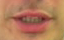

Saved frame 160 (Time: 39750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0159.png


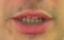

Saved frame 161 (Time: 40000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0160.png


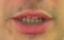

Saved frame 162 (Time: 40250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0161.png


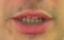

Saved frame 163 (Time: 40500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0162.png


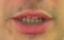

Saved frame 164 (Time: 40750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0163.png


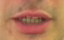

Saved frame 165 (Time: 41000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0164.png


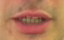

Saved frame 166 (Time: 41250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0165.png


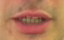

Saved frame 167 (Time: 41500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0166.png


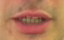

Saved frame 168 (Time: 41750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0167.png


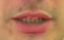

Saved frame 169 (Time: 42000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0168.png


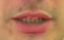

Saved frame 170 (Time: 42250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0169.png


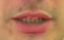

Saved frame 171 (Time: 42500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0170.png


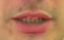

Saved frame 172 (Time: 42750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0171.png


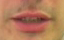

Saved frame 173 (Time: 43000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0172.png


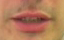

Saved frame 174 (Time: 43250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0173.png


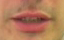

Saved frame 175 (Time: 43500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0174.png


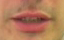

Saved frame 176 (Time: 43750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0175.png


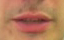

Saved frame 177 (Time: 44000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0176.png


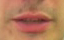

Saved frame 178 (Time: 44250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0177.png


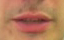

Saved frame 179 (Time: 44500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0178.png


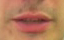

Saved frame 180 (Time: 44750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0179.png


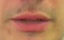

Saved frame 181 (Time: 45000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0180.png


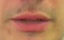

Saved frame 182 (Time: 45250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0181.png


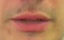

Saved frame 183 (Time: 45500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0182.png


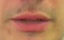

Saved frame 184 (Time: 45750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0183.png


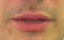

Saved frame 185 (Time: 46000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0184.png


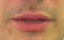

Saved frame 186 (Time: 46250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0185.png


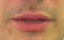

Saved frame 187 (Time: 46500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_lrws1a/again_0186.png


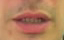

Saved frame 55 (Time: 13500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0054.png


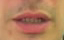

Saved frame 56 (Time: 13750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0055.png


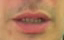

Saved frame 57 (Time: 14000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0056.png


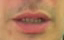

Saved frame 58 (Time: 14250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0057.png


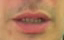

Saved frame 59 (Time: 14500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0058.png


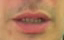

Saved frame 60 (Time: 14750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0059.png


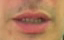

Saved frame 61 (Time: 15000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0060.png


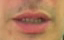

Saved frame 62 (Time: 15250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0061.png


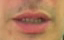

Saved frame 63 (Time: 15500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0062.png


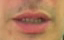

Saved frame 64 (Time: 15750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0063.png


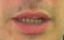

Saved frame 65 (Time: 16000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0064.png


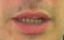

Saved frame 66 (Time: 16250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0065.png


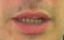

Saved frame 67 (Time: 16500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0066.png


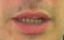

Saved frame 68 (Time: 16750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0067.png


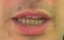

Saved frame 69 (Time: 17000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0068.png


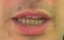

Saved frame 70 (Time: 17250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0069.png


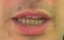

Saved frame 71 (Time: 17500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0070.png


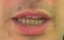

Saved frame 72 (Time: 17750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0071.png


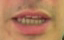

Saved frame 73 (Time: 18000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0072.png


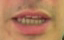

Saved frame 74 (Time: 18250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0073.png


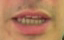

Saved frame 75 (Time: 18500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0074.png


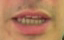

Saved frame 76 (Time: 18750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0075.png


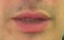

Saved frame 77 (Time: 19000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0076.png


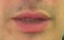

Saved frame 78 (Time: 19250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0077.png


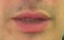

Saved frame 79 (Time: 19500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0078.png


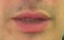

Saved frame 80 (Time: 19750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0079.png


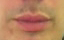

Saved frame 81 (Time: 20000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0080.png


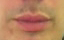

Saved frame 82 (Time: 20250.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0081.png


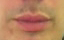

Saved frame 83 (Time: 20500.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0082.png


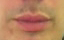

Saved frame 84 (Time: 20750.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0083.png


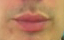

Saved frame 85 (Time: 21000.00 ms) -> Label: lay to /content/drive/My Drive/lipdata/lip_frames/lay/lay_lwiy8p/lay_0084.png


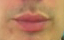

Saved frame 86 (Time: 21250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0085.png


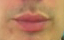

Saved frame 87 (Time: 21500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0086.png


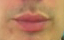

Saved frame 88 (Time: 21750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0087.png


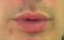

Saved frame 89 (Time: 22000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0088.png


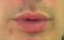

Saved frame 90 (Time: 22250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0089.png


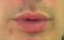

Saved frame 91 (Time: 22500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0090.png


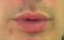

Saved frame 92 (Time: 22750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0091.png


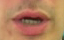

Saved frame 93 (Time: 23000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0092.png


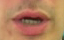

Saved frame 94 (Time: 23250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0093.png


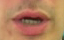

Saved frame 95 (Time: 23500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0094.png


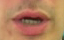

Saved frame 96 (Time: 23750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0095.png


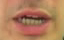

Saved frame 97 (Time: 24000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0096.png


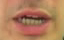

Saved frame 98 (Time: 24250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0097.png


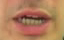

Saved frame 99 (Time: 24500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0098.png


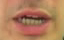

Saved frame 100 (Time: 24750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0099.png


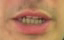

Saved frame 101 (Time: 25000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0100.png


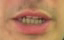

Saved frame 102 (Time: 25250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0101.png


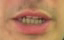

Saved frame 103 (Time: 25500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0102.png


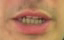

Saved frame 104 (Time: 25750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0103.png


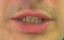

Saved frame 105 (Time: 26000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0104.png


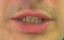

Saved frame 106 (Time: 26250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0105.png


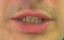

Saved frame 107 (Time: 26500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0106.png


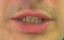

Saved frame 108 (Time: 26750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0107.png


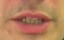

Saved frame 109 (Time: 27000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0108.png


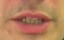

Saved frame 110 (Time: 27250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0109.png


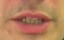

Saved frame 111 (Time: 27500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0110.png


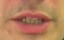

Saved frame 112 (Time: 27750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0111.png


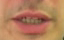

Saved frame 113 (Time: 28000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_lwiy8p/white_0112.png


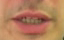

Saved frame 114 (Time: 28250.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0113.png


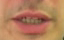

Saved frame 115 (Time: 28500.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0114.png


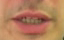

Saved frame 116 (Time: 28750.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0115.png


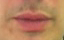

Saved frame 117 (Time: 29000.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0116.png


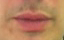

Saved frame 118 (Time: 29250.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0117.png


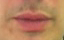

Saved frame 119 (Time: 29500.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0118.png


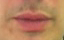

Saved frame 120 (Time: 29750.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0119.png


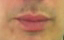

Saved frame 121 (Time: 30000.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0120.png


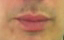

Saved frame 122 (Time: 30250.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0121.png


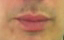

Saved frame 123 (Time: 30500.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0122.png


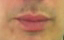

Saved frame 124 (Time: 30750.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0123.png


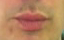

Saved frame 125 (Time: 31000.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0124.png


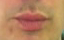

Saved frame 126 (Time: 31250.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0125.png


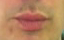

Saved frame 127 (Time: 31500.00 ms) -> Label: in to /content/drive/My Drive/lipdata/lip_frames/in/in_lwiy8p/in_0126.png


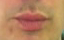

Saved frame 128 (Time: 31750.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0127.png


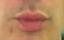

Saved frame 129 (Time: 32000.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0128.png


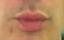

Saved frame 130 (Time: 32250.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0129.png


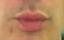

Saved frame 131 (Time: 32500.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0130.png


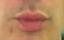

Saved frame 132 (Time: 32750.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0131.png


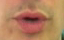

Saved frame 133 (Time: 33000.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0132.png


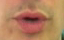

Saved frame 134 (Time: 33250.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0133.png


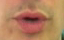

Saved frame 135 (Time: 33500.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0134.png


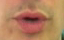

Saved frame 136 (Time: 33750.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0135.png


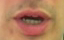

Saved frame 137 (Time: 34000.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0136.png


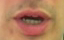

Saved frame 138 (Time: 34250.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0137.png


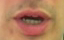

Saved frame 139 (Time: 34500.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0138.png


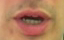

Saved frame 140 (Time: 34750.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0139.png


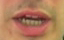

Saved frame 141 (Time: 35000.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0140.png


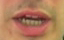

Saved frame 142 (Time: 35250.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0141.png


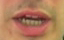

Saved frame 143 (Time: 35500.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0142.png


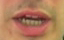

Saved frame 144 (Time: 35750.00 ms) -> Label: y to /content/drive/My Drive/lipdata/lip_frames/y/y_lwiy8p/y_0143.png


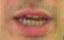

Saved frame 145 (Time: 36000.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0144.png


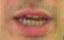

Saved frame 146 (Time: 36250.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0145.png


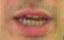

Saved frame 147 (Time: 36500.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0146.png


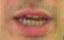

Saved frame 148 (Time: 36750.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0147.png


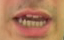

Saved frame 149 (Time: 37000.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0148.png


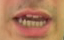

Saved frame 150 (Time: 37250.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0149.png


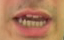

Saved frame 151 (Time: 37500.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0150.png


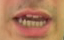

Saved frame 152 (Time: 37750.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0151.png


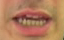

Saved frame 153 (Time: 38000.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0152.png


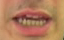

Saved frame 154 (Time: 38250.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0153.png


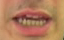

Saved frame 155 (Time: 38500.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0154.png


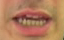

Saved frame 156 (Time: 38750.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0155.png


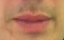

Saved frame 157 (Time: 39000.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0156.png


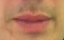

Saved frame 158 (Time: 39250.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0157.png


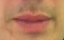

Saved frame 159 (Time: 39500.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0158.png


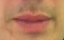

Saved frame 160 (Time: 39750.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0159.png


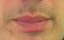

Saved frame 161 (Time: 40000.00 ms) -> Label: eight to /content/drive/My Drive/lipdata/lip_frames/eight/eight_lwiy8p/eight_0160.png


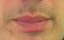

Saved frame 162 (Time: 40250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0161.png


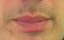

Saved frame 163 (Time: 40500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0162.png


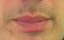

Saved frame 164 (Time: 40750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0163.png


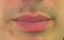

Saved frame 165 (Time: 41000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0164.png


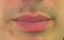

Saved frame 166 (Time: 41250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0165.png


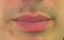

Saved frame 167 (Time: 41500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0166.png


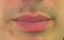

Saved frame 168 (Time: 41750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0167.png


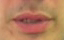

Saved frame 169 (Time: 42000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0168.png


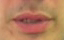

Saved frame 170 (Time: 42250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0169.png


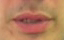

Saved frame 171 (Time: 42500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0170.png


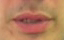

Saved frame 172 (Time: 42750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0171.png


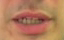

Saved frame 173 (Time: 43000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0172.png


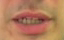

Saved frame 174 (Time: 43250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0173.png


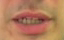

Saved frame 175 (Time: 43500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0174.png


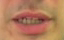

Saved frame 176 (Time: 43750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0175.png


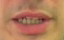

Saved frame 177 (Time: 44000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0176.png


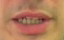

Saved frame 178 (Time: 44250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0177.png


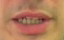

Saved frame 179 (Time: 44500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0178.png


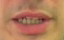

Saved frame 180 (Time: 44750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0179.png


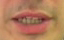

Saved frame 181 (Time: 45000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0180.png


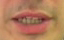

Saved frame 182 (Time: 45250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0181.png


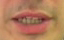

Saved frame 183 (Time: 45500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0182.png


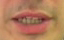

Saved frame 184 (Time: 45750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0183.png


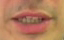

Saved frame 185 (Time: 46000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0184.png


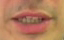

Saved frame 186 (Time: 46250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0185.png


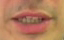

Saved frame 187 (Time: 46500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0186.png


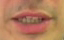

Saved frame 188 (Time: 46750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0187.png


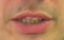

Saved frame 189 (Time: 47000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0188.png


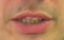

Saved frame 190 (Time: 47250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0189.png


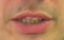

Saved frame 191 (Time: 47500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0190.png


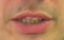

Saved frame 192 (Time: 47750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0191.png


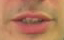

Saved frame 193 (Time: 48000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0192.png


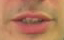

Saved frame 194 (Time: 48250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0193.png


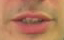

Saved frame 195 (Time: 48500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0194.png


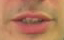

Saved frame 196 (Time: 48750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0195.png


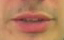

Saved frame 197 (Time: 49000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0196.png


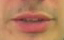

Saved frame 198 (Time: 49250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0197.png


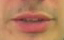

Saved frame 199 (Time: 49500.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0198.png


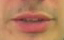

Saved frame 200 (Time: 49750.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0199.png


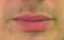

Saved frame 201 (Time: 50000.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0200.png


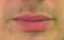

Saved frame 202 (Time: 50250.00 ms) -> Label: please to /content/drive/My Drive/lipdata/lip_frames/please/please_lwiy8p/please_0201.png


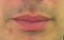

Saved frame 85 (Time: 21000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0084.png


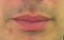

Saved frame 86 (Time: 21250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0085.png


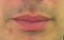

Saved frame 87 (Time: 21500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0086.png


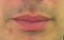

Saved frame 88 (Time: 21750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0087.png


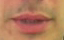

Saved frame 89 (Time: 22000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0088.png


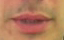

Saved frame 90 (Time: 22250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0089.png


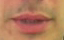

Saved frame 91 (Time: 22500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0090.png


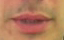

Saved frame 92 (Time: 22750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0091.png


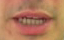

Saved frame 93 (Time: 23000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0092.png


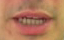

Saved frame 94 (Time: 23250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0093.png


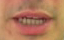

Saved frame 95 (Time: 23500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0094.png


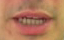

Saved frame 96 (Time: 23750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0095.png


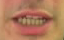

Saved frame 97 (Time: 24000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0096.png


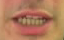

Saved frame 98 (Time: 24250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0097.png


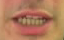

Saved frame 99 (Time: 24500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0098.png


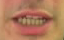

Saved frame 100 (Time: 24750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0099.png


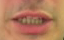

Saved frame 101 (Time: 25000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0100.png


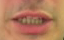

Saved frame 102 (Time: 25250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0101.png


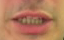

Saved frame 103 (Time: 25500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0102.png


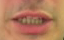

Saved frame 104 (Time: 25750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0103.png


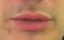

Saved frame 105 (Time: 26000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0104.png


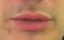

Saved frame 106 (Time: 26250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0105.png


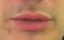

Saved frame 107 (Time: 26500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0106.png


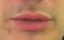

Saved frame 108 (Time: 26750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0107.png


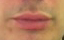

Saved frame 109 (Time: 27000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0108.png


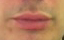

Saved frame 110 (Time: 27250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0109.png


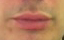

Saved frame 111 (Time: 27500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_prbj7a/place_0110.png


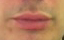

Saved frame 112 (Time: 27750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0111.png


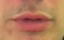

Saved frame 113 (Time: 28000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0112.png


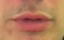

Saved frame 114 (Time: 28250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0113.png


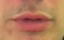

Saved frame 115 (Time: 28500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0114.png


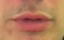

Saved frame 116 (Time: 28750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0115.png


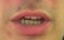

Saved frame 117 (Time: 29000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0116.png


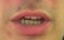

Saved frame 118 (Time: 29250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0117.png


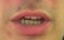

Saved frame 119 (Time: 29500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0118.png


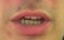

Saved frame 120 (Time: 29750.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0119.png


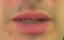

Saved frame 121 (Time: 30000.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0120.png


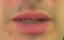

Saved frame 122 (Time: 30250.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0121.png


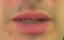

Saved frame 123 (Time: 30500.00 ms) -> Label: red to /content/drive/My Drive/lipdata/lip_frames/red/red_prbj7a/red_0122.png


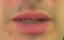

Saved frame 124 (Time: 30750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0123.png


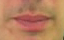

Saved frame 125 (Time: 31000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0124.png


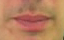

Saved frame 126 (Time: 31250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0125.png


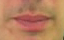

Saved frame 127 (Time: 31500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0126.png


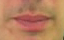

Saved frame 128 (Time: 31750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0127.png


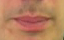

Saved frame 129 (Time: 32000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0128.png


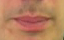

Saved frame 130 (Time: 32250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0129.png


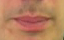

Saved frame 131 (Time: 32500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0130.png


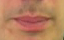

Saved frame 132 (Time: 32750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0131.png


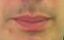

Saved frame 133 (Time: 33000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0132.png


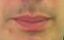

Saved frame 134 (Time: 33250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0133.png


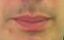

Saved frame 135 (Time: 33500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0134.png


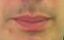

Saved frame 136 (Time: 33750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0135.png


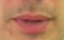

Saved frame 137 (Time: 34000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0136.png


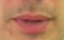

Saved frame 138 (Time: 34250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0137.png


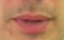

Saved frame 139 (Time: 34500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0138.png


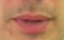

Saved frame 140 (Time: 34750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0139.png


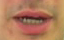

Saved frame 141 (Time: 35000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0140.png


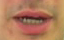

Saved frame 142 (Time: 35250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0141.png


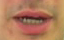

Saved frame 143 (Time: 35500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0142.png


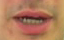

Saved frame 144 (Time: 35750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0143.png


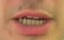

Saved frame 145 (Time: 36000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0144.png


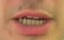

Saved frame 146 (Time: 36250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_prbj7a/by_0145.png


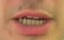

Saved frame 147 (Time: 36500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0146.png


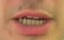

Saved frame 148 (Time: 36750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0147.png


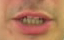

Saved frame 149 (Time: 37000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0148.png


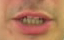

Saved frame 150 (Time: 37250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0149.png


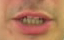

Saved frame 151 (Time: 37500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0150.png


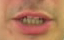

Saved frame 152 (Time: 37750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0151.png


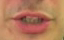

Saved frame 153 (Time: 38000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0152.png


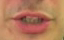

Saved frame 154 (Time: 38250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0153.png


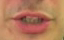

Saved frame 155 (Time: 38500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0154.png


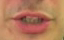

Saved frame 156 (Time: 38750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0155.png


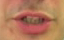

Saved frame 157 (Time: 39000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0156.png


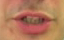

Saved frame 158 (Time: 39250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0157.png


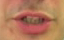

Saved frame 159 (Time: 39500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0158.png


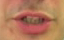

Saved frame 160 (Time: 39750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0159.png


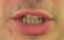

Saved frame 161 (Time: 40000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0160.png


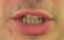

Saved frame 162 (Time: 40250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0161.png


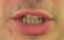

Saved frame 163 (Time: 40500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0162.png


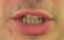

Saved frame 164 (Time: 40750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0163.png


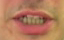

Saved frame 165 (Time: 41000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0164.png


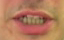

Saved frame 166 (Time: 41250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_prbj7a/j_0165.png


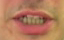

Saved frame 167 (Time: 41500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0166.png


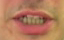

Saved frame 168 (Time: 41750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0167.png


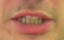

Saved frame 169 (Time: 42000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0168.png


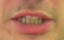

Saved frame 170 (Time: 42250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0169.png


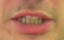

Saved frame 171 (Time: 42500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0170.png


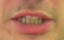

Saved frame 172 (Time: 42750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0171.png


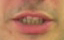

Saved frame 173 (Time: 43000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0172.png


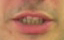

Saved frame 174 (Time: 43250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0173.png


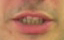

Saved frame 175 (Time: 43500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0174.png


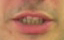

Saved frame 176 (Time: 43750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0175.png


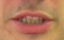

Saved frame 177 (Time: 44000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0176.png


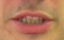

Saved frame 178 (Time: 44250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0177.png


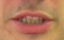

Saved frame 179 (Time: 44500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0178.png


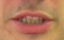

Saved frame 180 (Time: 44750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0179.png


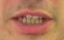

Saved frame 181 (Time: 45000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0180.png


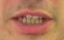

Saved frame 182 (Time: 45250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0181.png


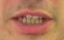

Saved frame 183 (Time: 45500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0182.png


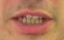

Saved frame 184 (Time: 45750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0183.png


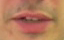

Saved frame 185 (Time: 46000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0184.png


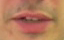

Saved frame 186 (Time: 46250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0185.png


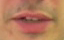

Saved frame 187 (Time: 46500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0186.png


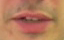

Saved frame 188 (Time: 46750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0187.png


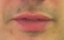

Saved frame 189 (Time: 47000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0188.png


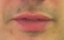

Saved frame 190 (Time: 47250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0189.png


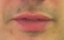

Saved frame 191 (Time: 47500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0190.png


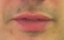

Saved frame 192 (Time: 47750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0191.png


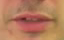

Saved frame 193 (Time: 48000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0192.png


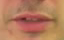

Saved frame 194 (Time: 48250.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0193.png


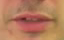

Saved frame 195 (Time: 48500.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0194.png


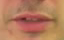

Saved frame 196 (Time: 48750.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0195.png


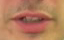

Saved frame 197 (Time: 49000.00 ms) -> Label: seven to /content/drive/My Drive/lipdata/lip_frames/seven/seven_prbj7a/seven_0196.png


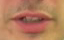

Saved frame 198 (Time: 49250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0197.png


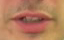

Saved frame 199 (Time: 49500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0198.png


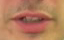

Saved frame 200 (Time: 49750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0199.png


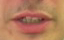

Saved frame 201 (Time: 50000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0200.png


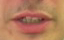

Saved frame 202 (Time: 50250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0201.png


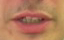

Saved frame 203 (Time: 50500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0202.png


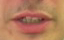

Saved frame 204 (Time: 50750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0203.png


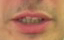

Saved frame 205 (Time: 51000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0204.png


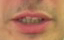

Saved frame 206 (Time: 51250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0205.png


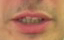

Saved frame 207 (Time: 51500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0206.png


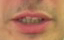

Saved frame 208 (Time: 51750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0207.png


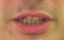

Saved frame 209 (Time: 52000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0208.png


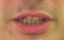

Saved frame 210 (Time: 52250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0209.png


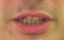

Saved frame 211 (Time: 52500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0210.png


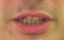

Saved frame 212 (Time: 52750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0211.png


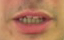

Saved frame 213 (Time: 53000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0212.png


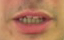

Saved frame 214 (Time: 53250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0213.png


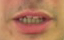

Saved frame 215 (Time: 53500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0214.png


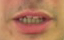

Saved frame 216 (Time: 53750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0215.png


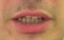

Saved frame 217 (Time: 54000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0216.png


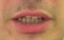

Saved frame 218 (Time: 54250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0217.png


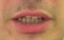

Saved frame 219 (Time: 54500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0218.png


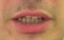

Saved frame 220 (Time: 54750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0219.png


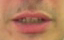

Saved frame 221 (Time: 55000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0220.png


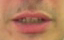

Saved frame 222 (Time: 55250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0221.png


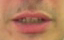

Saved frame 223 (Time: 55500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0222.png


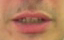

Saved frame 224 (Time: 55750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0223.png


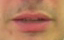

Saved frame 225 (Time: 56000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0224.png


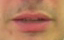

Saved frame 226 (Time: 56250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0225.png


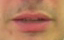

Saved frame 227 (Time: 56500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0226.png


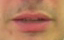

Saved frame 228 (Time: 56750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0227.png


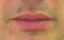

Saved frame 229 (Time: 57000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_prbj7a/again_0228.png


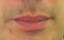

Saved frame 70 (Time: 17250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0069.png


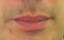

Saved frame 71 (Time: 17500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0070.png


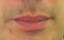

Saved frame 72 (Time: 17750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0071.png


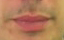

Saved frame 73 (Time: 18000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0072.png


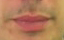

Saved frame 74 (Time: 18250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0073.png


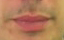

Saved frame 75 (Time: 18500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0074.png


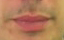

Saved frame 76 (Time: 18750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0075.png


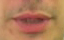

Saved frame 77 (Time: 19000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0076.png


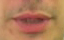

Saved frame 78 (Time: 19250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0077.png


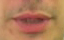

Saved frame 79 (Time: 19500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0078.png


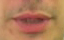

Saved frame 80 (Time: 19750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0079.png


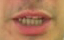

Saved frame 81 (Time: 20000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0080.png


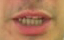

Saved frame 82 (Time: 20250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0081.png


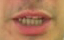

Saved frame 83 (Time: 20500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0082.png


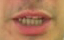

Saved frame 84 (Time: 20750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0083.png


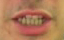

Saved frame 85 (Time: 21000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0084.png


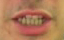

Saved frame 86 (Time: 21250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0085.png


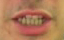

Saved frame 87 (Time: 21500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0086.png


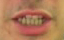

Saved frame 88 (Time: 21750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0087.png


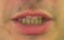

Saved frame 89 (Time: 22000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0088.png


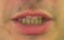

Saved frame 90 (Time: 22250.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0089.png


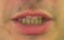

Saved frame 91 (Time: 22500.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0090.png


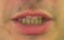

Saved frame 92 (Time: 22750.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0091.png


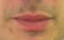

Saved frame 93 (Time: 23000.00 ms) -> Label: place to /content/drive/My Drive/lipdata/lip_frames/place/place_pbwj3s/place_0092.png


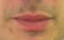

Saved frame 94 (Time: 23250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0093.png


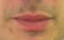

Saved frame 95 (Time: 23500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0094.png


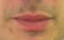

Saved frame 96 (Time: 23750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0095.png


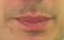

Saved frame 97 (Time: 24000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0096.png


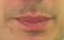

Saved frame 98 (Time: 24250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0097.png


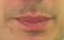

Saved frame 99 (Time: 24500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0098.png


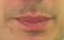

Saved frame 100 (Time: 24750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0099.png


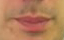

Saved frame 101 (Time: 25000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0100.png


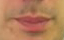

Saved frame 102 (Time: 25250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0101.png


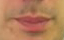

Saved frame 103 (Time: 25500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0102.png


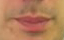

Saved frame 104 (Time: 25750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0103.png


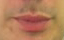

Saved frame 105 (Time: 26000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0104.png


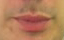

Saved frame 106 (Time: 26250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0105.png


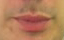

Saved frame 107 (Time: 26500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0106.png


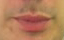

Saved frame 108 (Time: 26750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0107.png


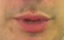

Saved frame 109 (Time: 27000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0108.png


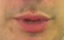

Saved frame 110 (Time: 27250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0109.png


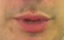

Saved frame 111 (Time: 27500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0110.png


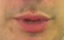

Saved frame 112 (Time: 27750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0111.png


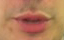

Saved frame 113 (Time: 28000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0112.png


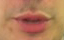

Saved frame 114 (Time: 28250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0113.png


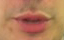

Saved frame 115 (Time: 28500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0114.png


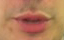

Saved frame 116 (Time: 28750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0115.png


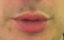

Saved frame 117 (Time: 29000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0116.png


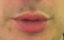

Saved frame 118 (Time: 29250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0117.png


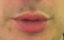

Saved frame 119 (Time: 29500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0118.png


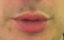

Saved frame 120 (Time: 29750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0119.png


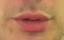

Saved frame 121 (Time: 30000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_pbwj3s/blue_0120.png


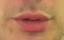

Saved frame 122 (Time: 30250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0121.png


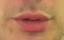

Saved frame 123 (Time: 30500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0122.png


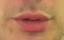

Saved frame 124 (Time: 30750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0123.png


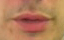

Saved frame 125 (Time: 31000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0124.png


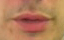

Saved frame 126 (Time: 31250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0125.png


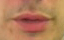

Saved frame 127 (Time: 31500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_pbwj3s/with_0126.png


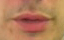

Saved frame 128 (Time: 31750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0127.png


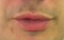

Saved frame 129 (Time: 32000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0128.png


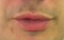

Saved frame 130 (Time: 32250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0129.png


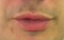

Saved frame 131 (Time: 32500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0130.png


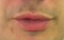

Saved frame 132 (Time: 32750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0131.png


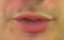

Saved frame 133 (Time: 33000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0132.png


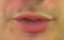

Saved frame 134 (Time: 33250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0133.png


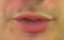

Saved frame 135 (Time: 33500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0134.png


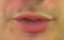

Saved frame 136 (Time: 33750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0135.png


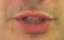

Saved frame 137 (Time: 34000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0136.png


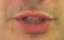

Saved frame 138 (Time: 34250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0137.png


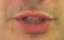

Saved frame 139 (Time: 34500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0138.png


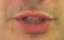

Saved frame 140 (Time: 34750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0139.png


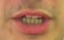

Saved frame 141 (Time: 35000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0140.png


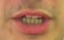

Saved frame 142 (Time: 35250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0141.png


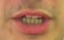

Saved frame 143 (Time: 35500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0142.png


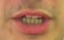

Saved frame 144 (Time: 35750.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0143.png


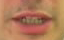

Saved frame 145 (Time: 36000.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0144.png


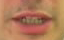

Saved frame 146 (Time: 36250.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0145.png


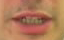

Saved frame 147 (Time: 36500.00 ms) -> Label: j to /content/drive/My Drive/lipdata/lip_frames/j/j_pbwj3s/j_0146.png


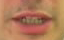

Saved frame 148 (Time: 36750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0147.png


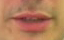

Saved frame 149 (Time: 37000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0148.png


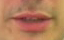

Saved frame 150 (Time: 37250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0149.png


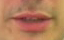

Saved frame 151 (Time: 37500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0150.png


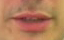

Saved frame 152 (Time: 37750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0151.png


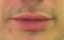

Saved frame 153 (Time: 38000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0152.png


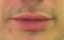

Saved frame 154 (Time: 38250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0153.png


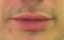

Saved frame 155 (Time: 38500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0154.png


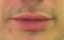

Saved frame 156 (Time: 38750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0155.png


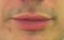

Saved frame 157 (Time: 39000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0156.png


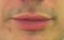

Saved frame 158 (Time: 39250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0157.png


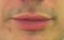

Saved frame 159 (Time: 39500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0158.png


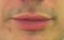

Saved frame 160 (Time: 39750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0159.png


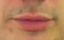

Saved frame 161 (Time: 40000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0160.png


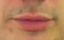

Saved frame 162 (Time: 40250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0161.png


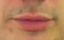

Saved frame 163 (Time: 40500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0162.png


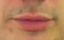

Saved frame 164 (Time: 40750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0163.png


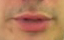

Saved frame 165 (Time: 41000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0164.png


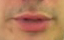

Saved frame 166 (Time: 41250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0165.png


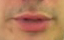

Saved frame 167 (Time: 41500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0166.png


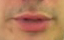

Saved frame 168 (Time: 41750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0167.png


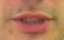

Saved frame 169 (Time: 42000.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0168.png


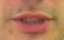

Saved frame 170 (Time: 42250.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0169.png


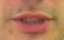

Saved frame 171 (Time: 42500.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0170.png


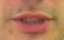

Saved frame 172 (Time: 42750.00 ms) -> Label: three to /content/drive/My Drive/lipdata/lip_frames/three/three_pbwj3s/three_0171.png


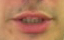

Saved frame 173 (Time: 43000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0172.png


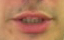

Saved frame 174 (Time: 43250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0173.png


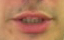

Saved frame 175 (Time: 43500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0174.png


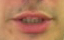

Saved frame 176 (Time: 43750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0175.png


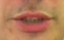

Saved frame 177 (Time: 44000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0176.png


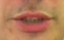

Saved frame 178 (Time: 44250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0177.png


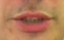

Saved frame 179 (Time: 44500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0178.png


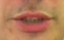

Saved frame 180 (Time: 44750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0179.png


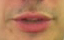

Saved frame 181 (Time: 45000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0180.png


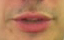

Saved frame 182 (Time: 45250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0181.png


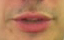

Saved frame 183 (Time: 45500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0182.png


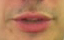

Saved frame 184 (Time: 45750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0183.png


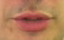

Saved frame 185 (Time: 46000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0184.png


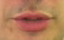

Saved frame 186 (Time: 46250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0185.png


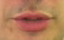

Saved frame 187 (Time: 46500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0186.png


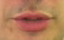

Saved frame 188 (Time: 46750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0187.png


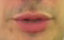

Saved frame 189 (Time: 47000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0188.png


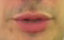

Saved frame 190 (Time: 47250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0189.png


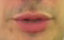

Saved frame 191 (Time: 47500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0190.png


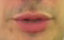

Saved frame 192 (Time: 47750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0191.png


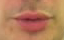

Saved frame 193 (Time: 48000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0192.png


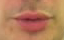

Saved frame 194 (Time: 48250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0193.png


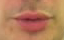

Saved frame 195 (Time: 48500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0194.png


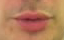

Saved frame 196 (Time: 48750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0195.png


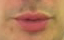

Saved frame 197 (Time: 49000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0196.png


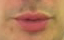

Saved frame 198 (Time: 49250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0197.png


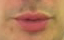

Saved frame 199 (Time: 49500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0198.png


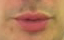

Saved frame 200 (Time: 49750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0199.png


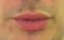

Saved frame 201 (Time: 50000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0200.png


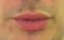

Saved frame 202 (Time: 50250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0201.png


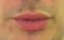

Saved frame 203 (Time: 50500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0202.png


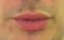

Saved frame 204 (Time: 50750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0203.png


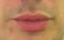

Saved frame 205 (Time: 51000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0204.png


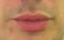

Saved frame 206 (Time: 51250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0205.png


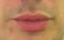

Saved frame 207 (Time: 51500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0206.png


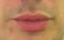

Saved frame 208 (Time: 51750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0207.png


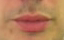

Saved frame 209 (Time: 52000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0208.png


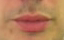

Saved frame 210 (Time: 52250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0209.png


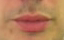

Saved frame 211 (Time: 52500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_pbwj3s/soon_0210.png


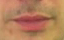

Saved frame 38 (Time: 9250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0037.png


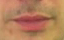

Saved frame 39 (Time: 9500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0038.png


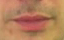

Saved frame 40 (Time: 9750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0039.png


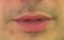

Saved frame 41 (Time: 10000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0040.png


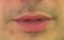

Saved frame 42 (Time: 10250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0041.png


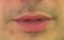

Saved frame 43 (Time: 10500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0042.png


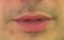

Saved frame 44 (Time: 10750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0043.png


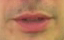

Saved frame 45 (Time: 11000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0044.png


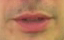

Saved frame 46 (Time: 11250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0045.png


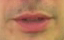

Saved frame 47 (Time: 11500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0046.png


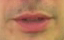

Saved frame 48 (Time: 11750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0047.png


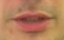

Saved frame 49 (Time: 12000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0048.png


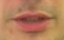

Saved frame 50 (Time: 12250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0049.png


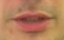

Saved frame 51 (Time: 12500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0050.png


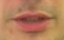

Saved frame 52 (Time: 12750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0051.png


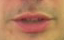

Saved frame 53 (Time: 13000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0052.png


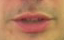

Saved frame 54 (Time: 13250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0053.png


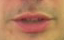

Saved frame 55 (Time: 13500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0054.png


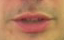

Saved frame 56 (Time: 13750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0055.png


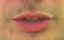

Saved frame 57 (Time: 14000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0056.png


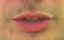

Saved frame 58 (Time: 14250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0057.png


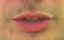

Saved frame 59 (Time: 14500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0058.png


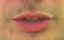

Saved frame 60 (Time: 14750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0059.png


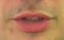

Saved frame 61 (Time: 15000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0060.png


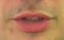

Saved frame 62 (Time: 15250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0061.png


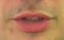

Saved frame 63 (Time: 15500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0062.png


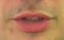

Saved frame 64 (Time: 15750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0063.png


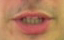

Saved frame 65 (Time: 16000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0064.png


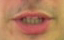

Saved frame 66 (Time: 16250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0065.png


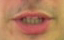

Saved frame 67 (Time: 16500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0066.png


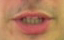

Saved frame 68 (Time: 16750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0067.png


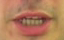

Saved frame 69 (Time: 17000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0068.png


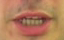

Saved frame 70 (Time: 17250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0069.png


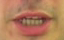

Saved frame 71 (Time: 17500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0070.png


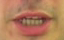

Saved frame 72 (Time: 17750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0071.png


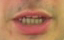

Saved frame 73 (Time: 18000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0072.png


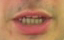

Saved frame 74 (Time: 18250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0073.png


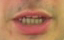

Saved frame 75 (Time: 18500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0074.png


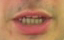

Saved frame 76 (Time: 18750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgav4n/set_0075.png


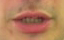

Saved frame 77 (Time: 19000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0076.png


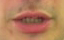

Saved frame 78 (Time: 19250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0077.png


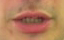

Saved frame 79 (Time: 19500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0078.png


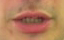

Saved frame 80 (Time: 19750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0079.png


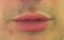

Saved frame 81 (Time: 20000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0080.png


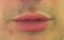

Saved frame 82 (Time: 20250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0081.png


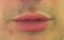

Saved frame 83 (Time: 20500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0082.png


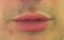

Saved frame 84 (Time: 20750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0083.png


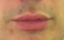

Saved frame 85 (Time: 21000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0084.png


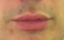

Saved frame 86 (Time: 21250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0085.png


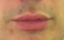

Saved frame 87 (Time: 21500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0086.png


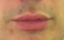

Saved frame 88 (Time: 21750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0087.png


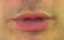

Saved frame 89 (Time: 22000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0088.png


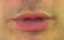

Saved frame 90 (Time: 22250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0089.png


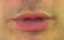

Saved frame 91 (Time: 22500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0090.png


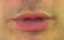

Saved frame 92 (Time: 22750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0091.png


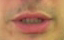

Saved frame 93 (Time: 23000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0092.png


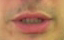

Saved frame 94 (Time: 23250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0093.png


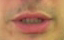

Saved frame 95 (Time: 23500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0094.png


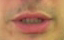

Saved frame 96 (Time: 23750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0095.png


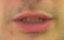

Saved frame 97 (Time: 24000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgav4n/green_0096.png


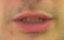

Saved frame 98 (Time: 24250.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0097.png


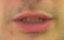

Saved frame 99 (Time: 24500.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0098.png


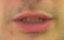

Saved frame 100 (Time: 24750.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0099.png


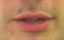

Saved frame 101 (Time: 25000.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0100.png


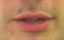

Saved frame 102 (Time: 25250.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0101.png


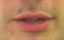

Saved frame 103 (Time: 25500.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0102.png


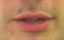

Saved frame 104 (Time: 25750.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0103.png


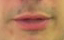

Saved frame 105 (Time: 26000.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0104.png


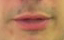

Saved frame 106 (Time: 26250.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0105.png


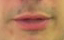

Saved frame 107 (Time: 26500.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0106.png


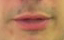

Saved frame 108 (Time: 26750.00 ms) -> Label: at to /content/drive/My Drive/lipdata/lip_frames/at/at_sgav4n/at_0107.png


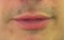

Saved frame 109 (Time: 27000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0108.png


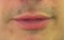

Saved frame 110 (Time: 27250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0109.png


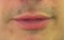

Saved frame 111 (Time: 27500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0110.png


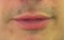

Saved frame 112 (Time: 27750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0111.png


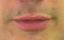

Saved frame 113 (Time: 28000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0112.png


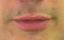

Saved frame 114 (Time: 28250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0113.png


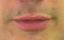

Saved frame 115 (Time: 28500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0114.png


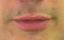

Saved frame 116 (Time: 28750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0115.png


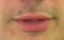

Saved frame 117 (Time: 29000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0116.png


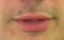

Saved frame 118 (Time: 29250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0117.png


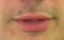

Saved frame 119 (Time: 29500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0118.png


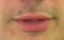

Saved frame 120 (Time: 29750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0119.png


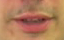

Saved frame 121 (Time: 30000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0120.png


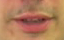

Saved frame 122 (Time: 30250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0121.png


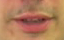

Saved frame 123 (Time: 30500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0122.png


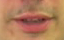

Saved frame 124 (Time: 30750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0123.png


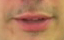

Saved frame 125 (Time: 31000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0124.png


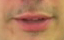

Saved frame 126 (Time: 31250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_sgav4n/v_0125.png


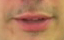

Saved frame 127 (Time: 31500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0126.png


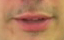

Saved frame 128 (Time: 31750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0127.png


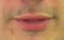

Saved frame 129 (Time: 32000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0128.png


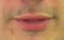

Saved frame 130 (Time: 32250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0129.png


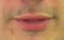

Saved frame 131 (Time: 32500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0130.png


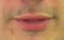

Saved frame 132 (Time: 32750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0131.png


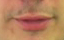

Saved frame 133 (Time: 33000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0132.png


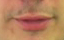

Saved frame 134 (Time: 33250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0133.png


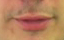

Saved frame 135 (Time: 33500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0134.png


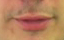

Saved frame 136 (Time: 33750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0135.png


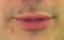

Saved frame 137 (Time: 34000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0136.png


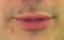

Saved frame 138 (Time: 34250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0137.png


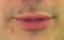

Saved frame 139 (Time: 34500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0138.png


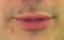

Saved frame 140 (Time: 34750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0139.png


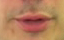

Saved frame 141 (Time: 35000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0140.png


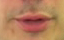

Saved frame 142 (Time: 35250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0141.png


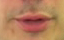

Saved frame 143 (Time: 35500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0142.png


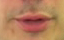

Saved frame 144 (Time: 35750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0143.png


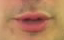

Saved frame 145 (Time: 36000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0144.png


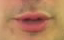

Saved frame 146 (Time: 36250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0145.png


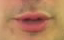

Saved frame 147 (Time: 36500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0146.png


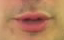

Saved frame 148 (Time: 36750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0147.png


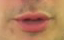

Saved frame 149 (Time: 37000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0148.png


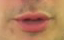

Saved frame 150 (Time: 37250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0149.png


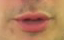

Saved frame 151 (Time: 37500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0150.png


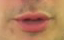

Saved frame 152 (Time: 37750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0151.png


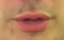

Saved frame 153 (Time: 38000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0152.png


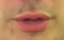

Saved frame 154 (Time: 38250.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0153.png


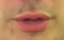

Saved frame 155 (Time: 38500.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0154.png


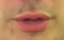

Saved frame 156 (Time: 38750.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0155.png


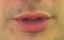

Saved frame 157 (Time: 39000.00 ms) -> Label: four to /content/drive/My Drive/lipdata/lip_frames/four/four_sgav4n/four_0156.png


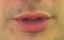

Saved frame 158 (Time: 39250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0157.png


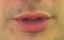

Saved frame 159 (Time: 39500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0158.png


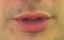

Saved frame 160 (Time: 39750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0159.png


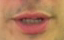

Saved frame 161 (Time: 40000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0160.png


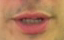

Saved frame 162 (Time: 40250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0161.png


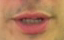

Saved frame 163 (Time: 40500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0162.png


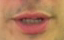

Saved frame 164 (Time: 40750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0163.png


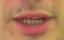

Saved frame 165 (Time: 41000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0164.png


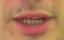

Saved frame 166 (Time: 41250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0165.png


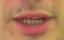

Saved frame 167 (Time: 41500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0166.png


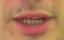

Saved frame 168 (Time: 41750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0167.png


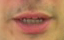

Saved frame 169 (Time: 42000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0168.png


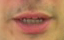

Saved frame 170 (Time: 42250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0169.png


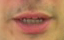

Saved frame 171 (Time: 42500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0170.png


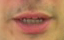

Saved frame 172 (Time: 42750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0171.png


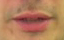

Saved frame 173 (Time: 43000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0172.png


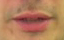

Saved frame 174 (Time: 43250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0173.png


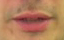

Saved frame 175 (Time: 43500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0174.png


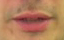

Saved frame 176 (Time: 43750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0175.png


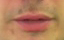

Saved frame 177 (Time: 44000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0176.png


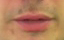

Saved frame 178 (Time: 44250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0177.png


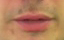

Saved frame 179 (Time: 44500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0178.png


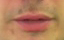

Saved frame 180 (Time: 44750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0179.png


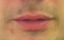

Saved frame 181 (Time: 45000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0180.png


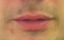

Saved frame 182 (Time: 45250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sgav4n/now_0181.png


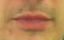

Saved frame 39 (Time: 9500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0038.png


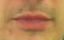

Saved frame 40 (Time: 9750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0039.png


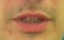

Saved frame 41 (Time: 10000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0040.png


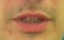

Saved frame 42 (Time: 10250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0041.png


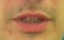

Saved frame 43 (Time: 10500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0042.png


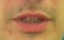

Saved frame 44 (Time: 10750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0043.png


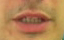

Saved frame 45 (Time: 11000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0044.png


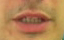

Saved frame 46 (Time: 11250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0045.png


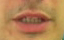

Saved frame 47 (Time: 11500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0046.png


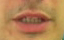

Saved frame 48 (Time: 11750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0047.png


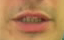

Saved frame 49 (Time: 12000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0048.png


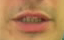

Saved frame 50 (Time: 12250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0049.png


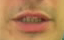

Saved frame 51 (Time: 12500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0050.png


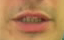

Saved frame 52 (Time: 12750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0051.png


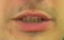

Saved frame 53 (Time: 13000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0052.png


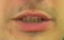

Saved frame 54 (Time: 13250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0053.png


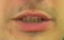

Saved frame 55 (Time: 13500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0054.png


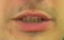

Saved frame 56 (Time: 13750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0055.png


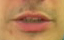

Saved frame 57 (Time: 14000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0056.png


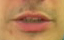

Saved frame 58 (Time: 14250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0057.png


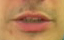

Saved frame 59 (Time: 14500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0058.png


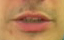

Saved frame 60 (Time: 14750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0059.png


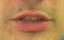

Saved frame 61 (Time: 15000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0060.png


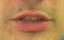

Saved frame 62 (Time: 15250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0061.png


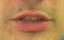

Saved frame 63 (Time: 15500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0062.png


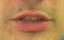

Saved frame 64 (Time: 15750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0063.png


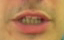

Saved frame 65 (Time: 16000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0064.png


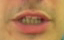

Saved frame 66 (Time: 16250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0065.png


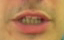

Saved frame 67 (Time: 16500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0066.png


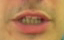

Saved frame 68 (Time: 16750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0067.png


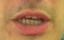

Saved frame 69 (Time: 17000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0068.png


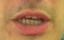

Saved frame 70 (Time: 17250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0069.png


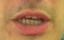

Saved frame 71 (Time: 17500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0070.png


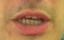

Saved frame 72 (Time: 17750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0071.png


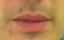

Saved frame 73 (Time: 18000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0072.png


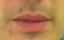

Saved frame 74 (Time: 18250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0073.png


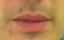

Saved frame 75 (Time: 18500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0074.png


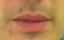

Saved frame 76 (Time: 18750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0075.png


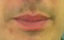

Saved frame 77 (Time: 19000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0076.png


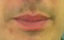

Saved frame 78 (Time: 19250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0077.png


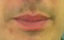

Saved frame 79 (Time: 19500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0078.png


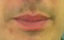

Saved frame 80 (Time: 19750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0079.png


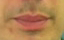

Saved frame 81 (Time: 20000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sbbn6n/set_0080.png


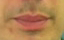

Saved frame 82 (Time: 20250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0081.png


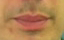

Saved frame 83 (Time: 20500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0082.png


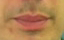

Saved frame 84 (Time: 20750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0083.png


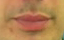

Saved frame 85 (Time: 21000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0084.png


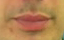

Saved frame 86 (Time: 21250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0085.png


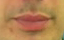

Saved frame 87 (Time: 21500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0086.png


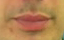

Saved frame 88 (Time: 21750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0087.png


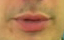

Saved frame 89 (Time: 22000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0088.png


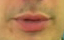

Saved frame 90 (Time: 22250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0089.png


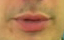

Saved frame 91 (Time: 22500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0090.png


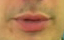

Saved frame 92 (Time: 22750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0091.png


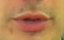

Saved frame 93 (Time: 23000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0092.png


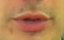

Saved frame 94 (Time: 23250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0093.png


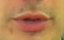

Saved frame 95 (Time: 23500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0094.png


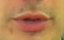

Saved frame 96 (Time: 23750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0095.png


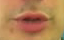

Saved frame 97 (Time: 24000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0096.png


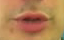

Saved frame 98 (Time: 24250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0097.png


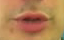

Saved frame 99 (Time: 24500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0098.png


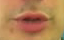

Saved frame 100 (Time: 24750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0099.png


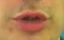

Saved frame 101 (Time: 25000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0100.png


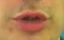

Saved frame 102 (Time: 25250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0101.png


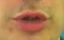

Saved frame 103 (Time: 25500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0102.png


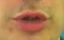

Saved frame 104 (Time: 25750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0103.png


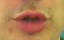

Saved frame 105 (Time: 26000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0104.png


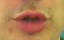

Saved frame 106 (Time: 26250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0105.png


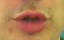

Saved frame 107 (Time: 26500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0106.png


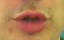

Saved frame 108 (Time: 26750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0107.png


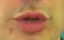

Saved frame 109 (Time: 27000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0108.png


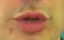

Saved frame 110 (Time: 27250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0109.png


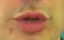

Saved frame 111 (Time: 27500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0110.png


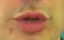

Saved frame 112 (Time: 27750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0111.png


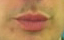

Saved frame 113 (Time: 28000.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0112.png


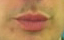

Saved frame 114 (Time: 28250.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0113.png


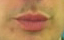

Saved frame 115 (Time: 28500.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0114.png


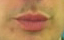

Saved frame 116 (Time: 28750.00 ms) -> Label: blue to /content/drive/My Drive/lipdata/lip_frames/blue/blue_sbbn6n/blue_0115.png


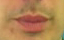

Saved frame 117 (Time: 29000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0116.png


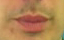

Saved frame 118 (Time: 29250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0117.png


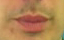

Saved frame 119 (Time: 29500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0118.png


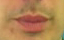

Saved frame 120 (Time: 29750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0119.png


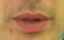

Saved frame 121 (Time: 30000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0120.png


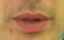

Saved frame 122 (Time: 30250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0121.png


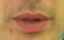

Saved frame 123 (Time: 30500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0122.png


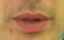

Saved frame 124 (Time: 30750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0123.png


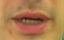

Saved frame 125 (Time: 31000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0124.png


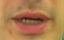

Saved frame 126 (Time: 31250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0125.png


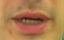

Saved frame 127 (Time: 31500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0126.png


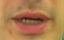

Saved frame 128 (Time: 31750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0127.png


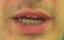

Saved frame 129 (Time: 32000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0128.png


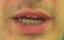

Saved frame 130 (Time: 32250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sbbn6n/by_0129.png


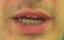

Saved frame 131 (Time: 32500.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0130.png


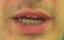

Saved frame 132 (Time: 32750.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0131.png


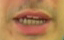

Saved frame 133 (Time: 33000.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0132.png


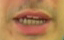

Saved frame 134 (Time: 33250.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0133.png


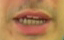

Saved frame 135 (Time: 33500.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0134.png


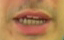

Saved frame 136 (Time: 33750.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0135.png


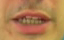

Saved frame 137 (Time: 34000.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0136.png


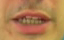

Saved frame 138 (Time: 34250.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0137.png


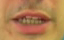

Saved frame 139 (Time: 34500.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0138.png


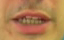

Saved frame 140 (Time: 34750.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0139.png


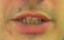

Saved frame 141 (Time: 35000.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0140.png


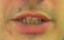

Saved frame 142 (Time: 35250.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0141.png


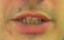

Saved frame 143 (Time: 35500.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0142.png


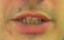

Saved frame 144 (Time: 35750.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0143.png


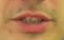

Saved frame 145 (Time: 36000.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0144.png


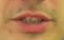

Saved frame 146 (Time: 36250.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0145.png


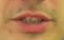

Saved frame 147 (Time: 36500.00 ms) -> Label: n to /content/drive/My Drive/lipdata/lip_frames/n/n_sbbn6n/n_0146.png


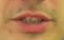

Saved frame 148 (Time: 36750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0147.png


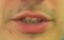

Saved frame 149 (Time: 37000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0148.png


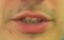

Saved frame 150 (Time: 37250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0149.png


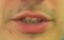

Saved frame 151 (Time: 37500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0150.png


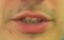

Saved frame 152 (Time: 37750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0151.png


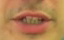

Saved frame 153 (Time: 38000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0152.png


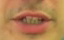

Saved frame 154 (Time: 38250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0153.png


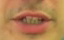

Saved frame 155 (Time: 38500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0154.png


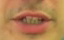

Saved frame 156 (Time: 38750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0155.png


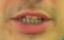

Saved frame 157 (Time: 39000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0156.png


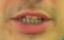

Saved frame 158 (Time: 39250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0157.png


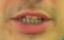

Saved frame 159 (Time: 39500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0158.png


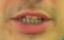

Saved frame 160 (Time: 39750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0159.png


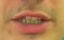

Saved frame 161 (Time: 40000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0160.png


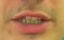

Saved frame 162 (Time: 40250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0161.png


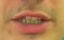

Saved frame 163 (Time: 40500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0162.png


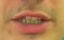

Saved frame 164 (Time: 40750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0163.png


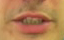

Saved frame 165 (Time: 41000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0164.png


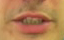

Saved frame 166 (Time: 41250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0165.png


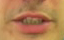

Saved frame 167 (Time: 41500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0166.png


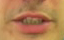

Saved frame 168 (Time: 41750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0167.png


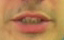

Saved frame 169 (Time: 42000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0168.png


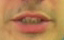

Saved frame 170 (Time: 42250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0169.png


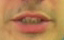

Saved frame 171 (Time: 42500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0170.png


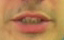

Saved frame 172 (Time: 42750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0171.png


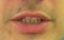

Saved frame 173 (Time: 43000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0172.png


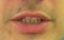

Saved frame 174 (Time: 43250.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0173.png


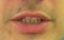

Saved frame 175 (Time: 43500.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0174.png


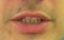

Saved frame 176 (Time: 43750.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0175.png


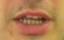

Saved frame 177 (Time: 44000.00 ms) -> Label: six to /content/drive/My Drive/lipdata/lip_frames/six/six_sbbn6n/six_0176.png


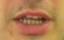

Saved frame 178 (Time: 44250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0177.png


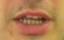

Saved frame 179 (Time: 44500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0178.png


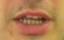

Saved frame 180 (Time: 44750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0179.png


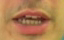

Saved frame 181 (Time: 45000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0180.png


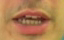

Saved frame 182 (Time: 45250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0181.png


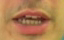

Saved frame 183 (Time: 45500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0182.png


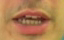

Saved frame 184 (Time: 45750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0183.png


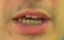

Saved frame 185 (Time: 46000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0184.png


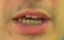

Saved frame 186 (Time: 46250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0185.png


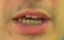

Saved frame 187 (Time: 46500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0186.png


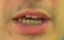

Saved frame 188 (Time: 46750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0187.png


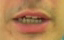

Saved frame 189 (Time: 47000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0188.png


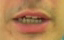

Saved frame 190 (Time: 47250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0189.png


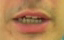

Saved frame 191 (Time: 47500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0190.png


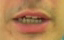

Saved frame 192 (Time: 47750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0191.png


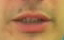

Saved frame 193 (Time: 48000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0192.png


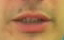

Saved frame 194 (Time: 48250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0193.png


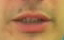

Saved frame 195 (Time: 48500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0194.png


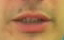

Saved frame 196 (Time: 48750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0195.png


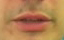

Saved frame 197 (Time: 49000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0196.png


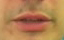

Saved frame 198 (Time: 49250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0197.png


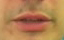

Saved frame 199 (Time: 49500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0198.png


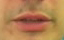

Saved frame 200 (Time: 49750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0199.png


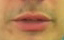

Saved frame 201 (Time: 50000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0200.png


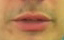

Saved frame 202 (Time: 50250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0201.png


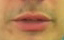

Saved frame 203 (Time: 50500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0202.png


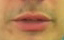

Saved frame 204 (Time: 50750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0203.png


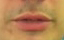

Saved frame 205 (Time: 51000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0204.png


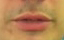

Saved frame 206 (Time: 51250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0205.png


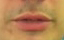

Saved frame 207 (Time: 51500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0206.png


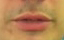

Saved frame 208 (Time: 51750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0207.png


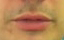

Saved frame 209 (Time: 52000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0208.png


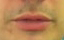

Saved frame 210 (Time: 52250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0209.png


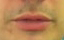

Saved frame 211 (Time: 52500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0210.png


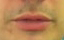

Saved frame 212 (Time: 52750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0211.png


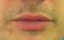

Saved frame 213 (Time: 53000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0212.png


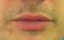

Saved frame 214 (Time: 53250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0213.png


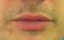

Saved frame 215 (Time: 53500.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0214.png


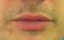

Saved frame 216 (Time: 53750.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0215.png


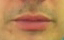

Saved frame 217 (Time: 54000.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0216.png


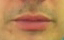

Saved frame 218 (Time: 54250.00 ms) -> Label: now to /content/drive/My Drive/lipdata/lip_frames/now/now_sbbn6n/now_0217.png


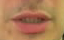

Saved frame 49 (Time: 12000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0048.png


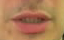

Saved frame 50 (Time: 12250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0049.png


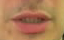

Saved frame 51 (Time: 12500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0050.png


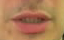

Saved frame 52 (Time: 12750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0051.png


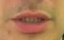

Saved frame 53 (Time: 13000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0052.png


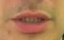

Saved frame 54 (Time: 13250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0053.png


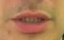

Saved frame 55 (Time: 13500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0054.png


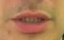

Saved frame 56 (Time: 13750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0055.png


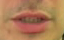

Saved frame 57 (Time: 14000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0056.png


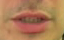

Saved frame 58 (Time: 14250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0057.png


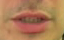

Saved frame 59 (Time: 14500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0058.png


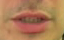

Saved frame 60 (Time: 14750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0059.png


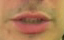

Saved frame 61 (Time: 15000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0060.png


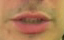

Saved frame 62 (Time: 15250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0061.png


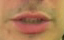

Saved frame 63 (Time: 15500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0062.png


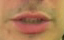

Saved frame 64 (Time: 15750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0063.png


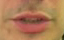

Saved frame 65 (Time: 16000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0064.png


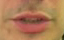

Saved frame 66 (Time: 16250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0065.png


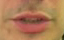

Saved frame 67 (Time: 16500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0066.png


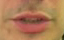

Saved frame 68 (Time: 16750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0067.png


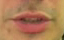

Saved frame 69 (Time: 17000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0068.png


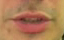

Saved frame 70 (Time: 17250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0069.png


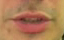

Saved frame 71 (Time: 17500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0070.png


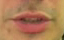

Saved frame 72 (Time: 17750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0071.png


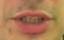

Saved frame 73 (Time: 18000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0072.png


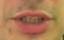

Saved frame 74 (Time: 18250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0073.png


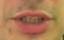

Saved frame 75 (Time: 18500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0074.png


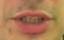

Saved frame 76 (Time: 18750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0075.png


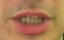

Saved frame 77 (Time: 19000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0076.png


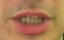

Saved frame 78 (Time: 19250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0077.png


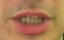

Saved frame 79 (Time: 19500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0078.png


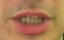

Saved frame 80 (Time: 19750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0079.png


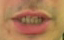

Saved frame 81 (Time: 20000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0080.png


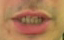

Saved frame 82 (Time: 20250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_sgbp5s/set_0081.png


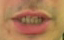

Saved frame 83 (Time: 20500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0082.png


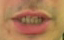

Saved frame 84 (Time: 20750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0083.png


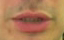

Saved frame 85 (Time: 21000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0084.png


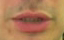

Saved frame 86 (Time: 21250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0085.png


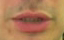

Saved frame 87 (Time: 21500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0086.png


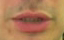

Saved frame 88 (Time: 21750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0087.png


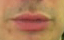

Saved frame 89 (Time: 22000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0088.png


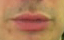

Saved frame 90 (Time: 22250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0089.png


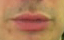

Saved frame 91 (Time: 22500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0090.png


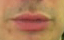

Saved frame 92 (Time: 22750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0091.png


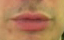

Saved frame 93 (Time: 23000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0092.png


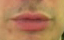

Saved frame 94 (Time: 23250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0093.png


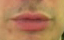

Saved frame 95 (Time: 23500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0094.png


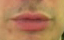

Saved frame 96 (Time: 23750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0095.png


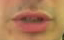

Saved frame 97 (Time: 24000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0096.png


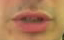

Saved frame 98 (Time: 24250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0097.png


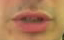

Saved frame 99 (Time: 24500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0098.png


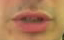

Saved frame 100 (Time: 24750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0099.png


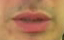

Saved frame 101 (Time: 25000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0100.png


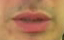

Saved frame 102 (Time: 25250.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0101.png


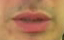

Saved frame 103 (Time: 25500.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0102.png


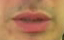

Saved frame 104 (Time: 25750.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0103.png


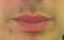

Saved frame 105 (Time: 26000.00 ms) -> Label: green to /content/drive/My Drive/lipdata/lip_frames/green/green_sgbp5s/green_0104.png


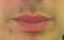

Saved frame 106 (Time: 26250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0105.png


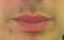

Saved frame 107 (Time: 26500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0106.png


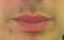

Saved frame 108 (Time: 26750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0107.png


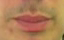

Saved frame 109 (Time: 27000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0108.png


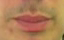

Saved frame 110 (Time: 27250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0109.png


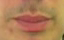

Saved frame 111 (Time: 27500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0110.png


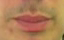

Saved frame 112 (Time: 27750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0111.png


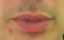

Saved frame 113 (Time: 28000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0112.png


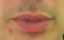

Saved frame 114 (Time: 28250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0113.png


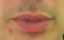

Saved frame 115 (Time: 28500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0114.png


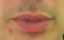

Saved frame 116 (Time: 28750.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0115.png


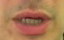

Saved frame 117 (Time: 29000.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0116.png


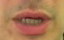

Saved frame 118 (Time: 29250.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0117.png


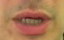

Saved frame 119 (Time: 29500.00 ms) -> Label: by to /content/drive/My Drive/lipdata/lip_frames/by/by_sgbp5s/by_0118.png


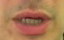

Saved frame 120 (Time: 29750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0119.png


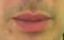

Saved frame 121 (Time: 30000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0120.png


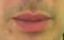

Saved frame 122 (Time: 30250.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0121.png


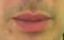

Saved frame 123 (Time: 30500.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0122.png


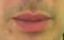

Saved frame 124 (Time: 30750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0123.png


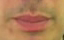

Saved frame 125 (Time: 31000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0124.png


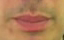

Saved frame 126 (Time: 31250.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0125.png


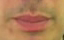

Saved frame 127 (Time: 31500.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0126.png


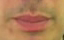

Saved frame 128 (Time: 31750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0127.png


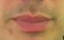

Saved frame 129 (Time: 32000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0128.png


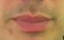

Saved frame 130 (Time: 32250.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0129.png


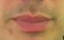

Saved frame 131 (Time: 32500.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0130.png


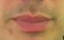

Saved frame 132 (Time: 32750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0131.png


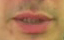

Saved frame 133 (Time: 33000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0132.png


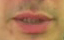

Saved frame 134 (Time: 33250.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0133.png


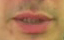

Saved frame 135 (Time: 33500.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0134.png


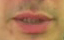

Saved frame 136 (Time: 33750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0135.png


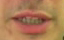

Saved frame 137 (Time: 34000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0136.png


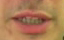

Saved frame 138 (Time: 34250.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0137.png


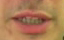

Saved frame 139 (Time: 34500.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0138.png


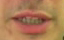

Saved frame 140 (Time: 34750.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0139.png


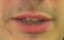

Saved frame 141 (Time: 35000.00 ms) -> Label: p to /content/drive/My Drive/lipdata/lip_frames/p/p_sgbp5s/p_0140.png


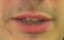

Saved frame 142 (Time: 35250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0141.png


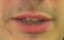

Saved frame 143 (Time: 35500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0142.png


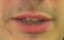

Saved frame 144 (Time: 35750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0143.png


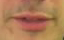

Saved frame 145 (Time: 36000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0144.png


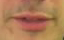

Saved frame 146 (Time: 36250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0145.png


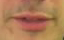

Saved frame 147 (Time: 36500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0146.png


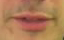

Saved frame 148 (Time: 36750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0147.png


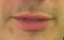

Saved frame 149 (Time: 37000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0148.png


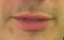

Saved frame 150 (Time: 37250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0149.png


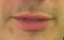

Saved frame 151 (Time: 37500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0150.png


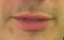

Saved frame 152 (Time: 37750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0151.png


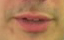

Saved frame 153 (Time: 38000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0152.png


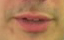

Saved frame 154 (Time: 38250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0153.png


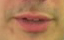

Saved frame 155 (Time: 38500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0154.png


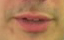

Saved frame 156 (Time: 38750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0155.png


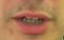

Saved frame 157 (Time: 39000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0156.png


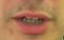

Saved frame 158 (Time: 39250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0157.png


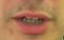

Saved frame 159 (Time: 39500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0158.png


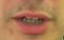

Saved frame 160 (Time: 39750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0159.png


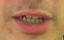

Saved frame 161 (Time: 40000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0160.png


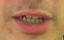

Saved frame 162 (Time: 40250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0161.png


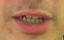

Saved frame 163 (Time: 40500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0162.png


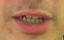

Saved frame 164 (Time: 40750.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0163.png


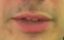

Saved frame 165 (Time: 41000.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0164.png


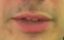

Saved frame 166 (Time: 41250.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0165.png


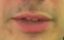

Saved frame 167 (Time: 41500.00 ms) -> Label: five to /content/drive/My Drive/lipdata/lip_frames/five/five_sgbp5s/five_0166.png


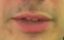

Saved frame 168 (Time: 41750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0167.png


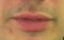

Saved frame 169 (Time: 42000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0168.png


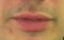

Saved frame 170 (Time: 42250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0169.png


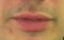

Saved frame 171 (Time: 42500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0170.png


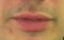

Saved frame 172 (Time: 42750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0171.png


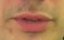

Saved frame 173 (Time: 43000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0172.png


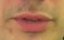

Saved frame 174 (Time: 43250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0173.png


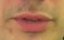

Saved frame 175 (Time: 43500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0174.png


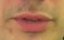

Saved frame 176 (Time: 43750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0175.png


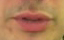

Saved frame 177 (Time: 44000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0176.png


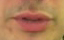

Saved frame 178 (Time: 44250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0177.png


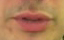

Saved frame 179 (Time: 44500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0178.png


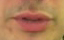

Saved frame 180 (Time: 44750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0179.png


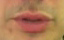

Saved frame 181 (Time: 45000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0180.png


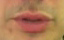

Saved frame 182 (Time: 45250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0181.png


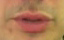

Saved frame 183 (Time: 45500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0182.png


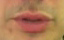

Saved frame 184 (Time: 45750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0183.png


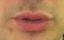

Saved frame 185 (Time: 46000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0184.png


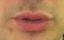

Saved frame 186 (Time: 46250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0185.png


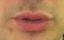

Saved frame 187 (Time: 46500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0186.png


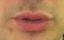

Saved frame 188 (Time: 46750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0187.png


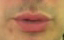

Saved frame 189 (Time: 47000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0188.png


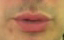

Saved frame 190 (Time: 47250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0189.png


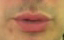

Saved frame 191 (Time: 47500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0190.png


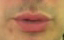

Saved frame 192 (Time: 47750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0191.png


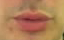

Saved frame 193 (Time: 48000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0192.png


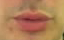

Saved frame 194 (Time: 48250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0193.png


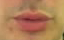

Saved frame 195 (Time: 48500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0194.png


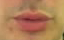

Saved frame 196 (Time: 48750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0195.png


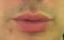

Saved frame 197 (Time: 49000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0196.png


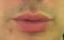

Saved frame 198 (Time: 49250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0197.png


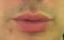

Saved frame 199 (Time: 49500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0198.png


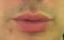

Saved frame 200 (Time: 49750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0199.png


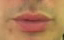

Saved frame 201 (Time: 50000.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0200.png


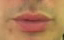

Saved frame 202 (Time: 50250.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0201.png


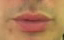

Saved frame 203 (Time: 50500.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0202.png


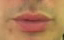

Saved frame 204 (Time: 50750.00 ms) -> Label: soon to /content/drive/My Drive/lipdata/lip_frames/soon/soon_sgbp5s/soon_0203.png


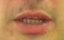

Saved frame 48 (Time: 11750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0047.png


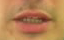

Saved frame 49 (Time: 12000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0048.png


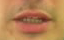

Saved frame 50 (Time: 12250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0049.png


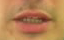

Saved frame 51 (Time: 12500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0050.png


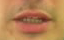

Saved frame 52 (Time: 12750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0051.png


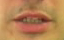

Saved frame 53 (Time: 13000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0052.png


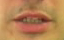

Saved frame 54 (Time: 13250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0053.png


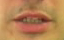

Saved frame 55 (Time: 13500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0054.png


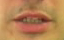

Saved frame 56 (Time: 13750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0055.png


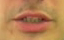

Saved frame 57 (Time: 14000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0056.png


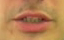

Saved frame 58 (Time: 14250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0057.png


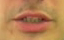

Saved frame 59 (Time: 14500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0058.png


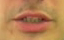

Saved frame 60 (Time: 14750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0059.png


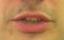

Saved frame 61 (Time: 15000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0060.png


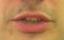

Saved frame 62 (Time: 15250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0061.png


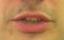

Saved frame 63 (Time: 15500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0062.png


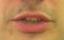

Saved frame 64 (Time: 15750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0063.png


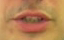

Saved frame 65 (Time: 16000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0064.png


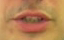

Saved frame 66 (Time: 16250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0065.png


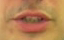

Saved frame 67 (Time: 16500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0066.png


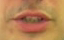

Saved frame 68 (Time: 16750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0067.png


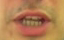

Saved frame 69 (Time: 17000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0068.png


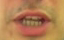

Saved frame 70 (Time: 17250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0069.png


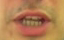

Saved frame 71 (Time: 17500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0070.png


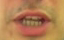

Saved frame 72 (Time: 17750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0071.png


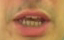

Saved frame 73 (Time: 18000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0072.png


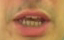

Saved frame 74 (Time: 18250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0073.png


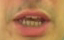

Saved frame 75 (Time: 18500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0074.png


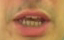

Saved frame 76 (Time: 18750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0075.png


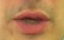

Saved frame 77 (Time: 19000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0076.png


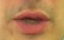

Saved frame 78 (Time: 19250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0077.png


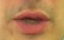

Saved frame 79 (Time: 19500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0078.png


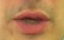

Saved frame 80 (Time: 19750.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0079.png


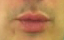

Saved frame 81 (Time: 20000.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0080.png


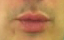

Saved frame 82 (Time: 20250.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0081.png


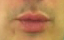

Saved frame 83 (Time: 20500.00 ms) -> Label: set to /content/drive/My Drive/lipdata/lip_frames/set/set_swwv9a/set_0082.png


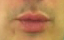

Saved frame 84 (Time: 20750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0083.png


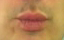

Saved frame 85 (Time: 21000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0084.png


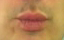

Saved frame 86 (Time: 21250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0085.png


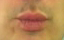

Saved frame 87 (Time: 21500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0086.png


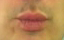

Saved frame 88 (Time: 21750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0087.png


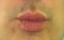

Saved frame 89 (Time: 22000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0088.png


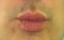

Saved frame 90 (Time: 22250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0089.png


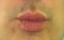

Saved frame 91 (Time: 22500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0090.png


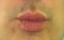

Saved frame 92 (Time: 22750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0091.png


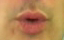

Saved frame 93 (Time: 23000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0092.png


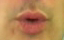

Saved frame 94 (Time: 23250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0093.png


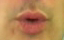

Saved frame 95 (Time: 23500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0094.png


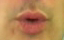

Saved frame 96 (Time: 23750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0095.png


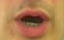

Saved frame 97 (Time: 24000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0096.png


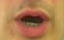

Saved frame 98 (Time: 24250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0097.png


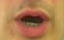

Saved frame 99 (Time: 24500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0098.png


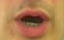

Saved frame 100 (Time: 24750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0099.png


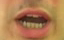

Saved frame 101 (Time: 25000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0100.png


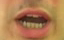

Saved frame 102 (Time: 25250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0101.png


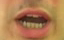

Saved frame 103 (Time: 25500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0102.png


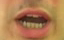

Saved frame 104 (Time: 25750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0103.png


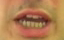

Saved frame 105 (Time: 26000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0104.png


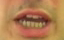

Saved frame 106 (Time: 26250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0105.png


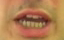

Saved frame 107 (Time: 26500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0106.png


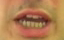

Saved frame 108 (Time: 26750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0107.png


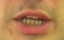

Saved frame 109 (Time: 27000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0108.png


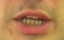

Saved frame 110 (Time: 27250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0109.png


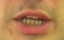

Saved frame 111 (Time: 27500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0110.png


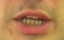

Saved frame 112 (Time: 27750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0111.png


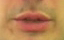

Saved frame 113 (Time: 28000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0112.png


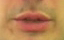

Saved frame 114 (Time: 28250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0113.png


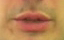

Saved frame 115 (Time: 28500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0114.png


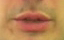

Saved frame 116 (Time: 28750.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0115.png


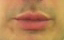

Saved frame 117 (Time: 29000.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0116.png


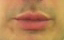

Saved frame 118 (Time: 29250.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0117.png


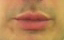

Saved frame 119 (Time: 29500.00 ms) -> Label: white to /content/drive/My Drive/lipdata/lip_frames/white/white_swwv9a/white_0118.png


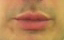

Saved frame 120 (Time: 29750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0119.png


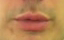

Saved frame 121 (Time: 30000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0120.png


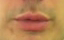

Saved frame 122 (Time: 30250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0121.png


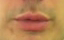

Saved frame 123 (Time: 30500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0122.png


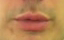

Saved frame 124 (Time: 30750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0123.png


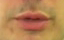

Saved frame 125 (Time: 31000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0124.png


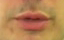

Saved frame 126 (Time: 31250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0125.png


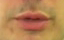

Saved frame 127 (Time: 31500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0126.png


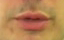

Saved frame 128 (Time: 31750.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0127.png


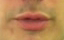

Saved frame 129 (Time: 32000.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0128.png


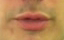

Saved frame 130 (Time: 32250.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0129.png


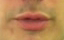

Saved frame 131 (Time: 32500.00 ms) -> Label: with to /content/drive/My Drive/lipdata/lip_frames/with/with_swwv9a/with_0130.png


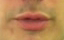

Saved frame 132 (Time: 32750.00 ms) -> Label: sp to /content/drive/My Drive/lipdata/lip_frames/sp/sp_swwv9a/sp_0131.png


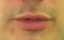

Saved frame 133 (Time: 33000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0132.png


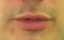

Saved frame 134 (Time: 33250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0133.png


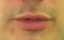

Saved frame 135 (Time: 33500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0134.png


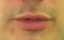

Saved frame 136 (Time: 33750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0135.png


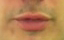

Saved frame 137 (Time: 34000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0136.png


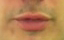

Saved frame 138 (Time: 34250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0137.png


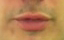

Saved frame 139 (Time: 34500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0138.png


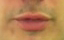

Saved frame 140 (Time: 34750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0139.png


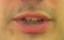

Saved frame 141 (Time: 35000.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0140.png


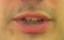

Saved frame 142 (Time: 35250.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0141.png


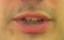

Saved frame 143 (Time: 35500.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0142.png


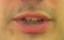

Saved frame 144 (Time: 35750.00 ms) -> Label: v to /content/drive/My Drive/lipdata/lip_frames/v/v_swwv9a/v_0143.png


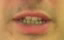

Saved frame 145 (Time: 36000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0144.png


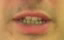

Saved frame 146 (Time: 36250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0145.png


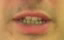

Saved frame 147 (Time: 36500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0146.png


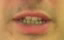

Saved frame 148 (Time: 36750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0147.png


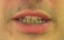

Saved frame 149 (Time: 37000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0148.png


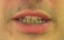

Saved frame 150 (Time: 37250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0149.png


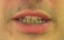

Saved frame 151 (Time: 37500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0150.png


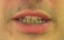

Saved frame 152 (Time: 37750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0151.png


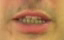

Saved frame 153 (Time: 38000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0152.png


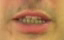

Saved frame 154 (Time: 38250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0153.png


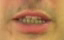

Saved frame 155 (Time: 38500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0154.png


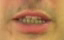

Saved frame 156 (Time: 38750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0155.png


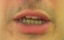

Saved frame 157 (Time: 39000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0156.png


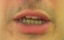

Saved frame 158 (Time: 39250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0157.png


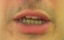

Saved frame 159 (Time: 39500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0158.png


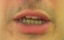

Saved frame 160 (Time: 39750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0159.png


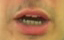

Saved frame 161 (Time: 40000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0160.png


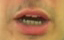

Saved frame 162 (Time: 40250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0161.png


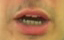

Saved frame 163 (Time: 40500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0162.png


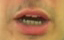

Saved frame 164 (Time: 40750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0163.png


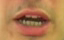

Saved frame 165 (Time: 41000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0164.png


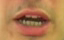

Saved frame 166 (Time: 41250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0165.png


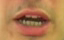

Saved frame 167 (Time: 41500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0166.png


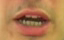

Saved frame 168 (Time: 41750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0167.png


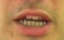

Saved frame 169 (Time: 42000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0168.png


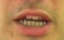

Saved frame 170 (Time: 42250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0169.png


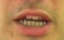

Saved frame 171 (Time: 42500.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0170.png


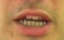

Saved frame 172 (Time: 42750.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0171.png


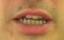

Saved frame 173 (Time: 43000.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0172.png


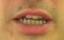

Saved frame 174 (Time: 43250.00 ms) -> Label: nine to /content/drive/My Drive/lipdata/lip_frames/nine/nine_swwv9a/nine_0173.png


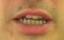

Saved frame 175 (Time: 43500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0174.png


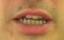

Saved frame 176 (Time: 43750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0175.png


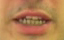

Saved frame 177 (Time: 44000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0176.png


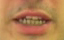

Saved frame 178 (Time: 44250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0177.png


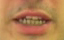

Saved frame 179 (Time: 44500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0178.png


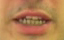

Saved frame 180 (Time: 44750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0179.png


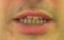

Saved frame 181 (Time: 45000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0180.png


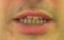

Saved frame 182 (Time: 45250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0181.png


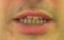

Saved frame 183 (Time: 45500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0182.png


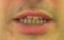

Saved frame 184 (Time: 45750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0183.png


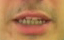

Saved frame 185 (Time: 46000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0184.png


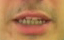

Saved frame 186 (Time: 46250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0185.png


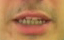

Saved frame 187 (Time: 46500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0186.png


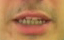

Saved frame 188 (Time: 46750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0187.png


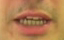

Saved frame 189 (Time: 47000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0188.png


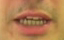

Saved frame 190 (Time: 47250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0189.png


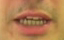

Saved frame 191 (Time: 47500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0190.png


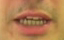

Saved frame 192 (Time: 47750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0191.png


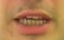

Saved frame 193 (Time: 48000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0192.png


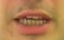

Saved frame 194 (Time: 48250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0193.png


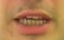

Saved frame 195 (Time: 48500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0194.png


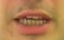

Saved frame 196 (Time: 48750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0195.png


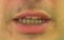

Saved frame 197 (Time: 49000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0196.png


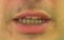

Saved frame 198 (Time: 49250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0197.png


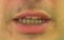

Saved frame 199 (Time: 49500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0198.png


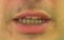

Saved frame 200 (Time: 49750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0199.png


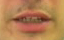

Saved frame 201 (Time: 50000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0200.png


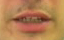

Saved frame 202 (Time: 50250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0201.png


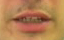

Saved frame 203 (Time: 50500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0202.png


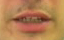

Saved frame 204 (Time: 50750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0203.png


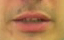

Saved frame 205 (Time: 51000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0204.png


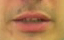

Saved frame 206 (Time: 51250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0205.png


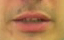

Saved frame 207 (Time: 51500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0206.png


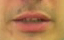

Saved frame 208 (Time: 51750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0207.png


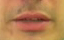

Saved frame 209 (Time: 52000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0208.png


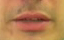

Saved frame 210 (Time: 52250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0209.png


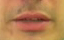

Saved frame 211 (Time: 52500.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0210.png


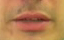

Saved frame 212 (Time: 52750.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0211.png


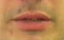

Saved frame 213 (Time: 53000.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0212.png


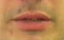

Saved frame 214 (Time: 53250.00 ms) -> Label: again to /content/drive/My Drive/lipdata/lip_frames/again/again_swwv9a/again_0213.png
All frames have been processed and saved.


In [ ]:
# Dlib modellerini yükleme
detector2 = dlib.get_frontal_face_detector()
predictor2 = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

# Dudak bölgesini tanımlama fonksiyonu
def get_lip_coordinates(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector2(gray)

    for face in faces:
        landmarks = predictor2(gray, face)

        # Dudak bölgesi (landmark noktaları 48-68)
        lip_points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 68)]
        x_min, y_min = np.min(lip_points, axis=0)
        x_max, y_max = np.max(lip_points, axis=0)
        """lip_points = []
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        # Dudak bölgesini içeren bir dikdörtgen oluşturma
        x_min = min([point[0] for point in lip_points])
        y_min = min([point[1] for point in lip_points])
        x_max = max([point[0] for point in lip_points])
        y_max = max([point[1] for point in lip_points])
        """

        return (x_min, y_min, x_max, y_max), lip_points
    return None, None

# yollar
video_folder_path = '/content/drive/My Drive/lipdata/lipdata/vid/'
align_folder_path = '/content/drive/My Drive/lipdata/lipdata/aligm/'
output_folder = '/content/drive/My Drive/lipdata/lip_frames'

# Klasörü oluşturma
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Video dosyalarını listeleme
video_files = [f for f in os.listdir(video_folder_path) if f.endswith('.mpg')]
global_x_min, global_y_min = float('inf'), float('inf')
global_x_max, global_y_max = float('-inf'), float('-inf')

# Dudak bölgesini belirleme
for video_file in video_files:
    video_file_path = os.path.join(video_folder_path, video_file)
    video = VideoFileClip(video_file_path)
    for frame in video.iter_frames(fps=25):
        coords, _ = get_lip_coordinates(frame)
        if coords is not None:
            x_min, y_min, x_max, y_max = coords
            global_x_min = min(global_x_min, x_min)
            global_y_min = min(global_y_min, y_min)
            global_x_max = max(global_x_max, x_max)
            global_y_max = max(global_y_max, y_max)

print(f"Global Lip Region: x_min={global_x_min}, y_min={global_y_min}, x_max={global_x_max}, y_max={global_y_max}")

# Her video dosyası için dudak bölgesini kırpma ve işleme
data, labels = [], []
for video_file in video_files:
    video_file_path = os.path.join(video_folder_path, video_file)
    align_file_name = os.path.splitext(video_file)[0] + '.align'
    align_file_path = os.path.join(align_folder_path, align_file_name)

    # .align dosyasını kontrol etme
    if not os.path.exists(align_file_path):
        print(f"Align file '{align_file_name}' does not exist for video '{video_file}'. Skipping...")
        continue

    # Zaman dilimlerini içeren .align dosyasını okuma
    with open(align_file_path, 'r') as file:
        align_data = file.read()
    annotations = [(int(start), int(end), label) for start, end, label in [line.split() for line in align_data.strip().split('\n')]]

    # Video dosyasını açma
    video = VideoFileClip(video_file_path)

    # Zaman dilimlerini kare numaralarına dönüştürme
    fps = video.fps
    frame_duration = 250  # Her karenin süresi (ms)
    frame_annotations = [(int(start / frame_duration), int(end / frame_duration), label) for start, end, label in annotations]

    # Zaman damgasını hesaplama
    frame_count = 0  # Çerçeve sayacı
    #target_time_ms = 0  # Hedef zaman

    for frame in video.iter_frames(fps=100):
        current_time_ms = frame_count * frame_duration
        coords, lip_points = get_lip_coordinates(frame)
        if coords is not None:
            x_min, y_min, x_max, y_max = coords
            lip_center_x, lip_center_y = np.mean(lip_points, axis=0).astype(int)
            """
            # Dudak bölgesinin merkezini hesaplama
            lip_center_x = int(np.mean([point[0] for point in lip_points]))
            lip_center_y = int(np.mean([point[1] for point in lip_points]))
            """
            # Dudak bölgesini merkeze almak için çerçeveyi kaydırma
            half_width = (global_x_max - global_x_min) // 2
            half_height = (global_y_max - global_y_min) // 2

            center_x_min = max(lip_center_x - half_width, 0)
            center_y_min = max(lip_center_y - half_height, 0)
            center_x_max = min(lip_center_x + half_width, frame.shape[1])
            center_y_max = min(lip_center_y + half_height, frame.shape[0])

            lip_region = frame[center_y_min:center_y_max, center_x_min:center_x_max]

            if lip_region is not None:
                current_label = next((label for start_frame, end_frame, label in frame_annotations if start_frame <= frame_count < end_frame), None)

                if current_label is not None and current_label != 'sil':  # Exclude frames with label "sil"
                    # Veriyi ve etiketi listelere ekleme
                    data.append(lip_region)
                    labels.append(current_label)

                    # Dudak bölgesini gösterme (renk dönüşümü olmadan)
                    cv2_imshow(cv2.cvtColor(lip_region, cv2.COLOR_RGB2BGR))
                    cv2.waitKey(250)  # 250 ms bekleme

                     # Kelime için dizin oluşturma
                    word_folder = os.path.join(output_folder, current_label)
                    os.makedirs(word_folder, exist_ok=True)

                    video_folder = os.path.join(word_folder, f"{current_label}_{os.path.splitext(video_file)[0]}")
                    os.makedirs(video_folder, exist_ok=True)

                    # Kareyi kaydetme
                    frame_filename = f"{current_label}_{frame_count:04d}.png"
                    frame_path = os.path.join(video_folder, frame_filename)
                    cv2.imwrite(frame_path, cv2.cvtColor(lip_region, cv2.COLOR_RGB2BGR))
                    print(f"Saved frame {frame_count + 1} (Time: {current_time_ms:.2f} ms) -> Label: {current_label} to {frame_path}")

        frame_count += 1

    cv2.destroyAllWindows()
print("All frames have been processed and saved.")


In [ ]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Masking
from sklearn.model_selection import train_test_split
# Define image dimensions
img_w, img_h = 40, 64
def load_images_from_folders(root_dir, img_w=40, img_h=64):
    """
    Klasörlerden görüntüleri yükler ve ön işler.
    Her ana klasör bir kelimeye, her alt klasör ise bir video örneğine karşılık gelir.
    """
    video_data, video_labels, label_map = [], [], {}
    for label, word_folder in enumerate(sorted(os.listdir(root_dir))):
        word_folder_path = os.path.join(root_dir, word_folder)
        if os.path.isdir(word_folder_path):
            for video_folder in sorted(os.listdir(word_folder_path)):
                video_folder_path = os.path.join(word_folder_path, video_folder)
                if os.path.isdir(video_folder_path):
                    frames = [
                        cv2.resize(cv2.imread(os.path.join(video_folder_path, image_name)), (img_w, img_h))
                        for image_name in sorted(os.listdir(video_folder_path))
                    ]
                    frames = np.array(frames).astype('float32') / 255.0
                    video_data.append(frames)
                    video_labels.append(label)
                    label_map[label] = word_folder
    return video_data, video_labels, label_map

def pad_sequences(sequences, maxlen, dtype='float32', padding='post', truncating='post', value=0.0):
    """
    Sequences listesinde belirtilen en uzun dizi uzunluğuna sahip olan tüm dizileri doldurur.
    """
    num_samples = len(sequences)
    padded_sequences = np.full((num_samples, maxlen, sequences[0].shape[1], sequences[0].shape[2], sequences[0].shape[3]), value, dtype=dtype)

    for i, seq in enumerate(sequences):
        if len(seq) > maxlen:
            if truncating == 'post':
                seq = seq[:maxlen]
            else:
                seq = seq[-maxlen:]

        if len(seq) < maxlen:
            if padding == 'post':
                padded_sequences[i, :len(seq)] = seq
            else:
                padded_sequences[i, -len(seq):] = seq
        else:
            padded_sequences[i] = seq

    return padded_sequences
# Örnek kullanım:
root_dir = '/content/drive/My Drive/lipdata/lip_frames'
video_data, video_labels, label_map = load_images_from_folders(root_dir, img_w, img_h)

# Örnek kullanım:
maxlen = 75  # Maksimum dizi uzunluğu
padded_video_data = pad_sequences(video_data, maxlen=maxlen)

# Verileri ve etiketleri numpy dizilerine dönüştürme
video_data_array = np.array(padded_video_data)
video_labels_array = np.array(video_labels)

X_train, X_test, y_train, y_test = train_test_split(video_data_array, video_labels_array, test_size=0.2, random_state=42)

# Basit bir sinir ağı modeli oluşturma
model = Sequential([
    Masking(mask_value=0.0, input_shape=(maxlen, img_h, img_w, 3)),
    Conv3D(32, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/20
2/2 [==============================] - 56s 19s/step - loss: 4.2759 - accuracy: 0.0417 - val_loss: 3.8350 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 45s 17s/step - loss: 3.7771 - accuracy: 0.0625 - val_loss: 3.4552 - val_accuracy: 0.0769
Epoch 3/20
2/2 [==============================] - 44s 16s/step - loss: 3.3407 - accuracy: 0.1667 - val_loss: 3.4430 - val_accuracy: 0.0769
Epoch 4/20
2/2 [==============================] - 43s 16s/step - loss: 3.2728 - accuracy: 0.2500 - val_loss: 3.3707 - val_accuracy: 0.0769
Epoch 5/20
2/2 [==============================] - 46s 17s/step - loss: 2.9351 - accuracy: 0.2708 - val_loss: 3.3694 - val_accuracy: 0.1538
Epoch 6/20
2/2 [==============================] - 49s 23s/step - loss: 2.6779 - accuracy: 0.2500 - val_loss: 3.7634 - val_accuracy: 0.0769
Epoch 7/20
2/2 [==============================] - 49s 19s/step - loss: 2.4405 - accuracy: 0.3333 - val_loss: 4.3423 - val_accuracy: 0.0769
Epoch 8/20
2/2 [=======

In [ ]:
model.summary()
